# **<span style="font-size:36px; color:purple;">Online Retail Transactions Study</span>**
#### A project realised by **Dr-eng.: Khalifa Mejbri, Expert in Engineering, Data Science and Machine Learning.**

The Online Retail II dataset on Kaggle contains transactional data from a UK-based online retailer, covering the period from December 1, 2009, to December 9, 2011. This dataset includes details such as **invoice numbers, product codes, descriptions, quantities, invoice dates, unit prices, customer IDs, and countries.** 

This data science project is established using this dataset, considering the following steps:

**1. Data Exploration and Preprocessing**
  * Load the Data: Import the dataset into a DataFrame using pandas.
  * Data Cleaning: Handle missing values, remove duplicates, and correct any inconsistencies.
  * Data Transformation: Convert data types as necessary, create new features (e.g., total transaction value), and extract time-based features from the invoice date.

**2. Exploratory Data Analysis (EDA)**
  * Sales Analysis: Analyze sales trends over time, identify peak sales periods, and assess product performance.
  * Customer Analysis: Examine customer demographics, purchasing behavior, and identify top customers by revenue.
  * Product Analysis: Determine best-selling products, analyze product categories, and assess product return rates.

**3. Customer Analysis: Behavior & Segmentation**
  * RFM Analysis: Perform Recency, Frequency, Monetary analysis to segment customers based on their purchasing behavior.
  * Clustering: Apply clustering algorithms (e.g., K-Means) to group customers into distinct segments for targeted marketing.

**4. Predictive Modeling**
  * Sales Forecasting: Use time series analysis to forecast future sales and inventory requirements.
  * Customer Churn Prediction: Build models to predict the likelihood of customers ceasing their purchases.

**5. Market Basket Analysis, Product Analysis and Sales Analysis**
  * Association Rule Mining: Identify product combinations frequently purchased together to inform cross-selling strategies.
  * Sales analysis focuses on sales trends, peak periods, and revenue patterns to understand business performance.
  * Product Analysis: Identify the best Sellers & Returns 

**6. Customer Churn Prediction**
  * Fraud Detection: Detect unusual purchasing patterns that may indicate fraudulent activities.

**7. Product Recommendation Systems:**
  * Develop collaborative filtering or content-based recommendation systems to suggest products to customers.
  
By following these steps, we can develop a comprehensive data science project that provides valuable insights into online retail operations and customer behaviors.

## **<span style="color:blue">I. Importing Libraries</span>**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_recall_curve, roc_curve, make_scorer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from annoy import AnnoyIndex

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="executing")

## **<span style="color:blue">II. Loading Data</span>**
 * **Loading dataset of the year 2009-2010.**
 * **Loading dataset of the year 2010-2011.**

In [4]:
# Loading dataset of 2009/2010
df_0910 = pd.read_excel("C:/Disc D/Datasets/Classification/online_retail_II.xlsx")
# Loading dataset of 2010/2011
df_1011 = pd.read_excel("C:/Disc D/Datasets/Classification/online_retail_III.xlsx")

In [3]:
# Display the first 5 rows of df_0910 dataframe
df_0910.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Display the first 5 rows of df_1011 dataframe
df_1011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Concatinate (merging) these 2 datasets in a one dataset called "df"
df = pd.concat([df_0910, df_1011])

In [6]:
# Reset the index to reindex the combined DataFrame
df.reset_index(drop=True, inplace=True)

In [7]:
# Rename the 'Customer ID' column
df.rename(columns={'Customer ID': 'CustomerID', 'Price': 'UnitPrice'}, inplace=True)

In [8]:
# Checking the shape of df dataset  
df.shape

(1067371, 8)

**There are 1067371 rows and 8 columns in the dataset.**

### **<span style="color:blue">III. Checking and removing duplicates</span>**

In [9]:
# Checking if there are duplicates in the df dataframe
duplicates = df[df.duplicated()]
duplicates.shape

(34335, 8)

**There are 34335 duplicated rows.**

In [10]:
# droping all the duplicates
df = df.drop_duplicates()

In [11]:
# Reset Index 
df = df.reset_index(drop=True)

In [12]:
# Verify That Duplicates Are Removed
print(df.duplicated().sum())  # Should return 0
print(df.shape)  # Check the new dimensions

0
(1033036, 8)


**Now there are no duplicates, and the remaining rows in the dataset are 1033036.**

## **<span style="color:blue">IV. Identify and Handle the Missing Values</span>**

In [13]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Invoice         0.000000
StockCode       0.000000
Description     0.413829
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     22.763098
Country         0.000000
dtype: float64


**2 columns have missing values:**
 * Description (0.41%).
 * Customer ID (22.76%).

### **<span style="color:green">1. Drop Missing Values of CustomerID columns</span>**
* This approach is recommended when customer-based analysis (customer behavior, retention, segmentation, RFM analysis) is required.
* Why? Since CustomerID is crucial for identifying unique customers, keeping rows without it would introduce noise and bias.

In [17]:
# df_customer a dataset for customer-based analysis
df_customer = df.copy()  # Ensure we work on a copy

# Drop Missing Values of Customer ID column
df_customer = df_customer.dropna(subset=['CustomerID'])

In [18]:
# Fill missing values of the 'Description' column with 'StockCode' correspending values
df_customer.loc[:, 'Description'] = df_customer.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Checking for the shape of df_customer
df_customer.shape

(797885, 8)

**The dataset df_customer (to be used for customer-based analysis) is composed of 797885 rows and 8 columns.**

### **<span style="color:green">2. Fill Missing Values of CustomerID columns (Imputation)</span>**
* This approach is used when we focus on overall sales trends, inventory management, or purchase behavior without customer segmentation.
* Impact: Preserves all transactions but does not distinguish actual customers from guest checkouts.

In [14]:
# df_sales a dataset for sales-based analysis
df_sales = df.copy()  # Ensure we work on a copy

# Fill missing CustomerID values with 0
df_sales['CustomerID'] = df_sales['CustomerID'].fillna(0)

In [15]:
# Fill missing 'Description' based on 'StockCode'
df_sales['Description'] = df_sales.groupby('StockCode')['Description'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

# Step 2: Fill any remaining missing descriptions with a placeholder
df_sales.loc[:, "Description"] = df_sales["Description"].fillna("Unknown Product")

# Checking for the shape of df_sales
df_sales.shape

(1033036, 8)

**The dataset df_sales (to be used for sales trends, inventory management, or purchase behavior analysis) is composed of 1033036 rows and 8 columns.**

### **<span style="color:green">3. Verify Data Cleaning</span>**

In [19]:
# Check if missing values are handled for df_customer
print(df_customer.isnull().sum())  

# Check final data types
print(df_customer.info())  

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   UnitPrice    797885 non-null  float64       
 6   CustomerID   797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB
None


In [20]:
# Check if missing values are handled for df_customer
print(df_sales.isnull().sum())  

# Check final data types
print(df_sales.info())  

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1033036 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   UnitPrice    1033036 non-null  float64       
 6   CustomerID   1033036 non-null  float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.1+ MB
None


**Now, there are no missing values in the 2 datasets: df_customer and df_sales.**

## **<span style="color:blue">V. Customer Segmentation</span>**

For customer-based analysis (RFM, clustering, segmentation, etc.), we need meaningful features to enhance the '**df_customer**' dataset.

### **<span style="color:green">1. Data Preprocessing</span>**

In [21]:
# Convert CustomerID to integer
df_customer['CustomerID'] = df_customer['CustomerID'].astype(int)

# Convert InvoiceDate to datetime format
df_customer['InvoiceDate'] = pd.to_datetime(df_customer['InvoiceDate'])

# Create TotalPrice column (Revenue per transaction)
df_customer['TotalPrice'] = df_customer['Quantity'] * df_customer['UnitPrice']

### **<span style="color:green">2. Feature Engineering for RFM Analysis</span>**
* **Recency** → How recent was the last purchase?
* **Frequency** → How often did the customer purchase?
* **Monetary** → How much money did they spend?

In [22]:
# Define a reference date (e.g., the last invoice date in dataset)
reference_date = df_customer['InvoiceDate'].max()

# Calculate RFM Metrics
rfm = df_customer.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency (days since last purchase)
    'Invoice': 'nunique',  # Frequency (number of unique purchases)
    'TotalPrice': 'sum'  # Monetary (total spend)
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

### **<span style="color:green">3. Feature Engineering for Customer Clustering</span>**

#### **1. Customer Lifetime Value (CLV)**

Predicts the total revenue a customer will generate over their lifetime.

In [23]:
df_customer['AvgOrderValue'] = df_customer['TotalPrice'] / df_customer['Invoice'].nunique()
rfm['CLV'] = rfm['Monetary'] * rfm['Frequency'] / (rfm['Recency'] + 1)

#### **2. Customer Segmentation Features**
* Average Basket Size (Average number of items per purchase).
* Discount Usage (Detect discounted purchases).
* Returns Percentage (Identify customers who return a lot).

In [24]:
# Basket Size: Average quantity of items per transaction
basket_size = df_customer.groupby('CustomerID')['Quantity'].mean()
rfm['AvgBasketSize'] = basket_size

# Returns Percentage: Percentage of orders that are returns (negative quantities)
returns = df_customer[df_customer['Quantity'] < 0].groupby('CustomerID')['Invoice'].count() / df_customer.groupby('CustomerID')['Invoice'].count()
rfm['ReturnRate'] = returns.fillna(0)

# Discount Indicator: Checking for special discount codes in StockCode
df_customer['Discounted'] = df_customer['StockCode'].astype(str).str.contains('D|DSC|DISCOUNT', case=False, na=False)
rfm['DiscountUsage'] = df_customer.groupby('CustomerID')['Discounted'].mean()

#### **3. Time-Based Features**

To analyze seasonality and purchase patterns, create:
 * Days Since First Purchase.
 * Days Between Purchases (Avg Interpurchase Time).
 * Hour of Day and Day of Week Purchases.

In [25]:
# Days since first purchase
first_purchase = df_customer.groupby('CustomerID')['InvoiceDate'].min()
rfm['DaysSinceFirstPurchase'] = (reference_date - first_purchase).dt.days

# Average Time Between Purchases
purchase_gaps = df_customer.groupby('CustomerID')['InvoiceDate'].diff().dt.days
rfm['AvgPurchaseGap'] = purchase_gaps.groupby(df_customer['CustomerID']).mean()

# Extract Time-Based Features
df_customer['Hour'] = df_customer['InvoiceDate'].dt.hour
df_customer['Weekday'] = df_customer['InvoiceDate'].dt.weekday
rfm['MostCommonPurchaseHour'] = df_customer.groupby('CustomerID')['Hour'].agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
rfm['MostCommonPurchaseDay'] = df_customer.groupby('CustomerID')['Weekday'].agg(lambda x: x.mode()[0] if not x.mode().empty else 0)

### **<span style="color:green">4. Customer Segmentation Using RFM & Clustering</span>**

Once the dataset is prepared, we can apply K-Means clustering to group customers based on behaviors.

For clustering the customers, we consider the features that affect clustering quality, and we selected only **Recency**, **Frequency**, and **Monetary** (**RFM**) because:
 * It captures essential customer behavior (recency, frequency, spending).
 * It avoids irrelevant/noisy features that could distort clustering.
 * It ensures distance-based clustering methods work properly.
 * It aligns with industry best practices for customer segmentation.

**Searching for the optimal number of clusters using the following techniques:**

#### **1. Elbow Method: Finding the Best n_clusters**

The Elbow Method helps determine n_clusters by checking when adding more clusters does not significantly improve compactness. Find the "elbow" where inertia starts decreasing slowly.

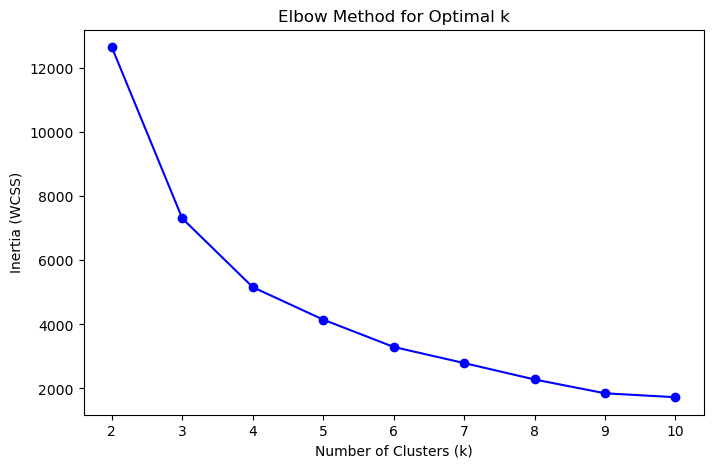

In [26]:
# Select features for clustering
#features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'ReturnRate', 'DaysSinceFirstPurchase', 'AvgPurchaseGap']
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features].fillna(0)  # Fill missing values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute Inertia for different cluster sizes
inertia = []
K_range = range(2, 11)  # Test clusters from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### **2. Silhouette Score: Checking Cluster Quality**

The Silhouette Score tells how well-separated the clusters are. It ranges from -1 to 1 (higher = better clusters).

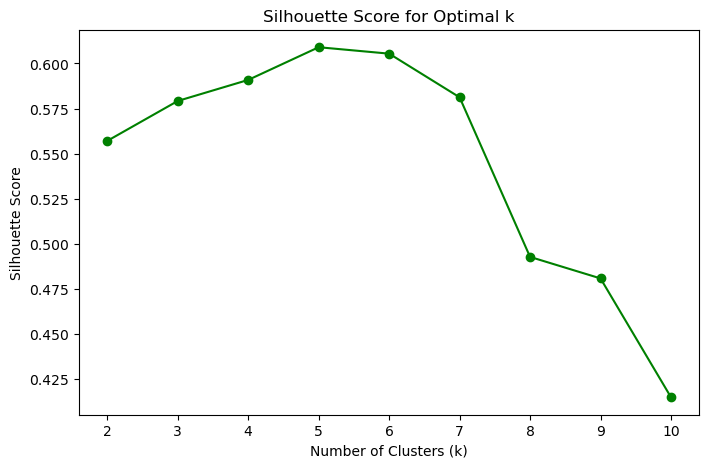

In [27]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

#### **3. Davies-Bouldin Index: Evaluating Compactness**

The Davies-Bouldin Index (DBI) measures how compact and distinct clusters are. Lower DBI is better (tighter, well-separated clusters).

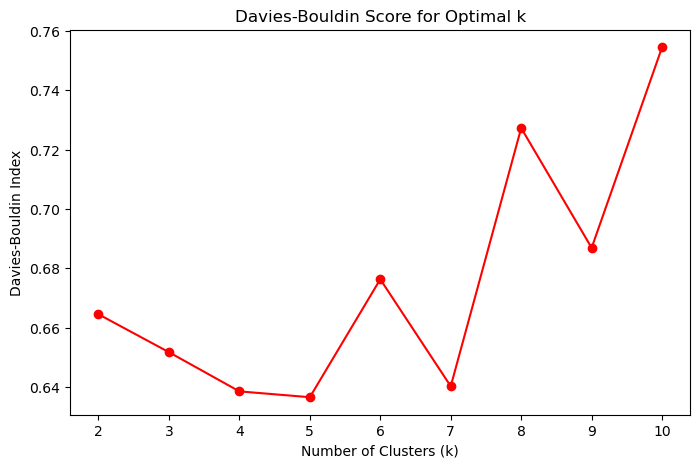

In [28]:
db_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_score)

# Plot the DB Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, db_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Score for Optimal k')
plt.show()

#### **4. Conclusion**

   Based on the clustering evaluation metrics, the optimal number of clusters for our customer segmentation is **n_clusters = 5**. The **Silhouette Score**, which measures the compactness and separation of clusters, **reaches its maximum at k = 5**, indicating that this value provides the **best-defined and well-separated clusters**. Additionally, the **Davies-Bouldin Index**, which evaluates cluster compactness and distinctness, attains its **minimum at k = 5**, further confirming that this choice results in the most cohesive and well-separated customer groups. Since both metrics align at k = 5, this ensures that our segmentation model effectively captures customer purchasing patterns while minimizing overlap between groups. **Therefore, selecting 5 clusters provides the most meaningful and actionable segmentation for customer analysis.**

#### **5. Clustering the customer to 5 clusters**

In [29]:
# Select features for clustering
#features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'ReturnRate', 'DaysSinceFirstPurchase', 'AvgPurchaseGap']
X = rfm[features].fillna(0)  # Fill missing values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

#### **6. Visualize Clustering Results**
 * **Since the data has three features (Recency, Frequency, Monetary), we use Principal Component Analysis (PCA) to reduce it to 2D for visualization.**

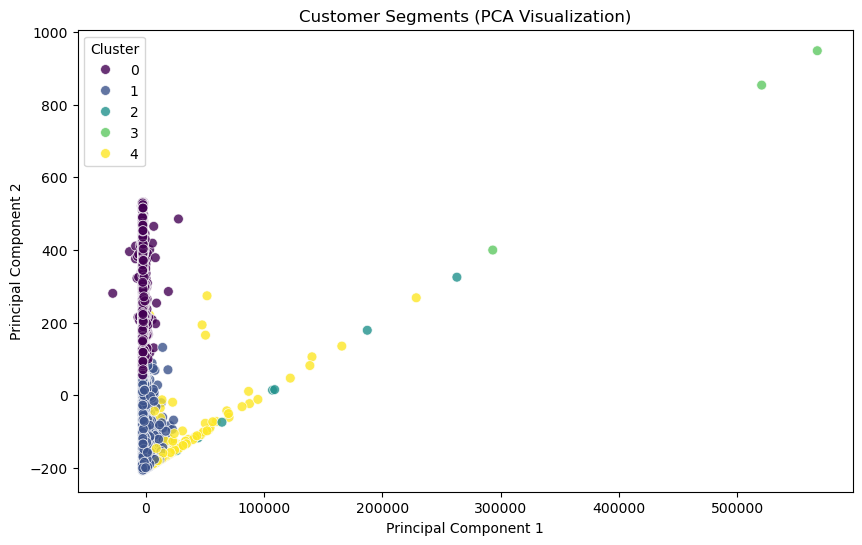

In [30]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Add PCA columns to DataFrame
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['PCA1'], y=rfm['PCA2'], hue=rfm['Cluster'], palette='viridis', s=50, alpha=0.8)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

 * **3D Scatter Plot**

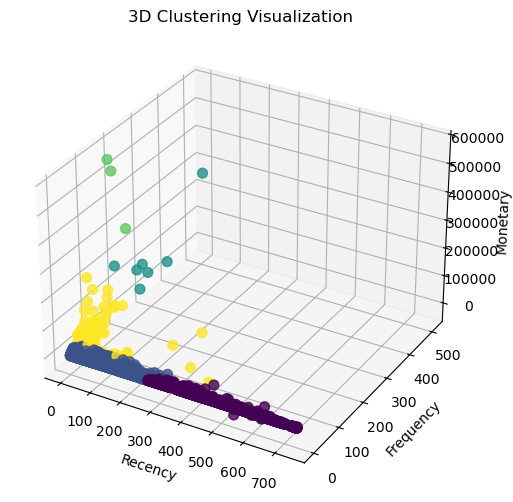

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
           c=rfm['Cluster'], cmap='viridis', s=50, alpha=0.8)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering Visualization')

plt.show()

#### **7. Interpretation of Customer Segments**

In [32]:
# Add 'CustomerID' as a column in rfm dataframe
rfm = rfm.reset_index()

**Compute Cluster Statistics**

In [33]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Number of customers per segment
}).rename(columns={'CustomerID': 'Num_Customers'})

,Recency,Frequency,Monetary,Num_Customers
Cluster,,,,
0,469.594283,2.555165,599.829906,1994
1,69.097418,7.288794,2178.588627,3757
2,0.857143,300.571429,117247.020000,7
3,3.333333,173.000000,463262.040000,3
4,20.745856,54.000000,25958.329961,181


#### **Key Insights:**

**Cluster 0 - Churned Customers** – Haven't purchased in a long time, low spending & visit frequency.
  * High Recency (470 days since last purchase) → They haven't bought for a long time.
  * Low Frequency & Spending → Not valuable; likely lost customers.
  * **Retention Strategy:**
    * **Re-engagement Emails** → Send personalized “We Miss You” campaigns.
    * **Discount Offers** → Provide special discounts to encourage purchases.
    * **Win-Back Campaigns** → Offer free shipping or a time-sensitive deal.

**Cluster 1 - Regular Customers** – Purchase often but not high-value buyers. 
  * Moderate Recency (69 days) → Reasonably active.
  * Moderate Frequency & Spending → Consistent buyers but not VIPs.
  * **Growth Strategy:**
    * **Loyalty Program Enrollment** → Encourage joining a points-based reward system.
    * **Upselling & Cross-selling** → Recommend complementary products.
    * **Limited-Time Offers** → Push exclusive promotions to increase order value.

**Cluster 2 - VIP Customers** – Extremely loyal, high-frequency, and high-value shoppers.
  * Very Low Recency (1 day) → Extremely recent buyers.
  * Very High Frequency (300 orders!) → Shopping almost daily.
  * Very High Spending (~$117K per customer) → Top revenue generators.
  * **Retention Strategy:**
    * **Exclusive Early Access** → Offer priority sales access or members-only benefits.
    * **Personalized Product Recommendations** → AI-driven shopping suggestions.
    * **Premium Customer Support** → Dedicated account manager or VIP customer service.

**Cluster 3 - Top Elite Customers** – Highest spenders, very frequent buyers, very low recency.
  * Lowest Recency (3 days) → Very recent purchases.
  * Very High Frequency (173 orders) → Buying multiple times a week.
  * Highest Spending ($463K per customer) → Top 1% of revenue contributors.
  * **Retention & Engagement Strategy:**
    * **Invitation to VIP Events** → Private shopping events or exclusive launches.
    * **Luxury Perks** → Free gifts, custom packaging, personalized discounts.
    * **Exclusive Partnerships** → Access to high-end brands or premium memberships.

**Cluster 4 - High-Value Frequent Buyers** – Active, high-frequency, and high spending customers.
  * Low Recency (21 days) → Recent purchases.
  * High Frequency (54 orders) → Frequent shoppers.
  * High Spending (~$25K per customer) → Valuable but not VIPs. 
  
  * **Retention & Growth Strategy:**
    * **Subscription Model** → Offer a VIP subscription for special perks.
    * **Anniversary Discounts** → Reward loyalty with annual perks.
    * **Gamification** → Reward milestones, e.g., "Spend $500 more to unlock VIP status!"

**Conclusion:**
  * **Most valuable segments:** Clusters 2, 3, and 4 (VIPs, Elite Customers, and High-Value Buyers).
  * **At-risk customers:** Cluster 0 (Churned customers).
  * **Potential for growth:** Cluster 1 (Regular Customers who can be converted to high-value buyers).

## **<span style="color:blue">VI. Customer Behavior Analysis</span>**

### **<span style="color:green">1. Top Customers by Revenue</span>**

**Goal:** Identify the highest spending customers.

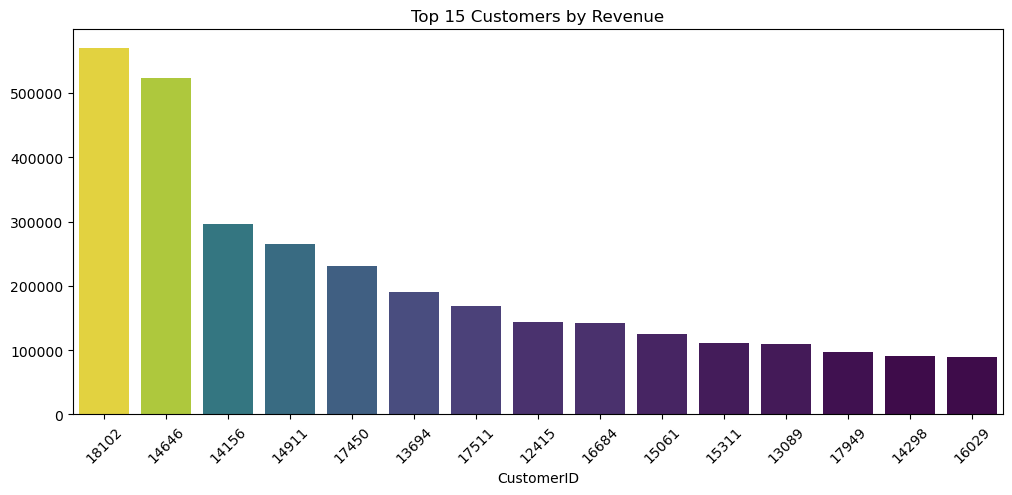

In [35]:
top_customers = df_customer.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_customers.index.astype(str), 
            y=top_customers.values, 
            hue=top_customers.values, 
            palette="viridis", 
            legend=False)  

plt.xticks(rotation=45)
plt.title("Top 15 Customers by Revenue")
plt.show()

#### **Interpretations**

The results show the top 15 customers ranked by total revenue contribution.
* **1. High Revenue Contribution:**
  * Customer 18102 is the highest spender, generating $570,380.61, followed closely by 14646 at $523,342.07.
  * These two customers alone contribute a significant share of total revenue.
* **2. Significant Drop After the Top 2:**
  * The third-highest customer (14156) has a noticeably lower contribution ($296,063.44), almost 50% less than the top customer.
  * This suggests that the first two customers are exceptional high-value clients.
* **3. Revenue Concentration:**
  * The top 5 customers collectively contribute a large portion of revenue, indicating that a small fraction of customers drive most sales.
  * This aligns with the Pareto Principle (80/20 rule)—where a small percentage of customers account for the majority of revenue.
* **4. Customer Segmentation Opportunity:**
  * These top spenders could be VIP or premium customers, ideal for loyalty programs, exclusive discounts, or personalized marketing.
  * Understanding their buying behavior can help optimize product offerings and retention strategies.

**Next Steps:**
  * Analyze their purchasing patterns (frequency, order size, preferred products).
  * Develop a retention strategy (personalized offers, premium services).
  * Compare with other customer segments to understand revenue distribution.

### **<span style="color:green">2. Customer Purchase Frequency</span>**

**Goal:** Understand purchase behavior & frequency.

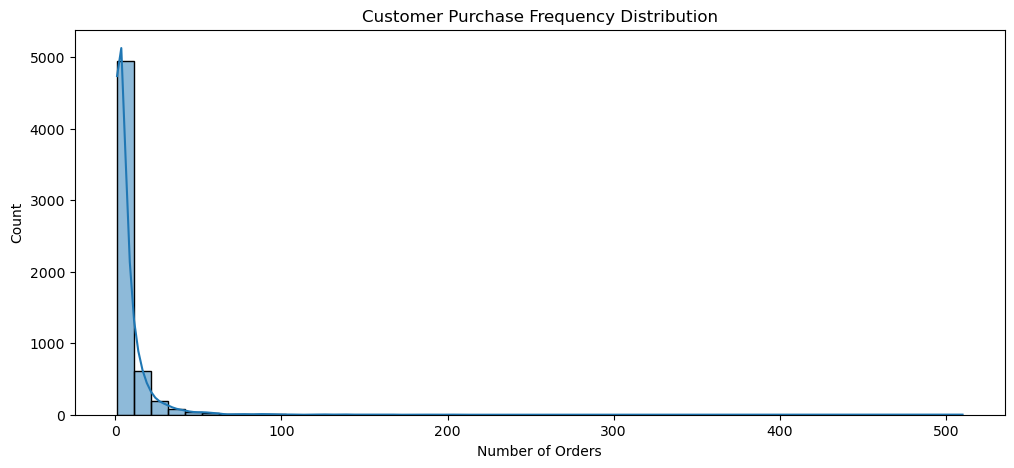

In [36]:
customer_orders = df_customer.groupby("CustomerID")["Invoice"].nunique()

plt.figure(figsize=(12, 5))
sns.histplot(customer_orders, bins=50, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Orders")
plt.show()

#### **Interpretations**

The results show how many unique invoices (orders) each customer has made.
* **1. Majority of Customers Order Only Once**
   * The highest count in your table is at Invoice = 1 with 1,461 customers.
   * This means most customers placed only one order.
* **2. Small Number of Repeat Customers**
   * The number of customers decreases as the number of orders increases.
   * There are fewer customers making multiple purchases (e.g., only a handful of customers made more than 50 orders).
   * A few high-value customers placed over 100 orders, with one even reaching 510 orders.
* **3. Insights from the Histogram**
   * The histogram likely shows a right-skewed distribution (most customers have low order counts, while a few have high order counts).
   * The KDE curve highlights this skewness, reinforcing that repeat purchases are rare.

#### **Business Implications**
 * **Customer Retention is a Challenge:** Most customers do not return for additional purchases.
 * **Loyal Customers Drive Revenue:** A small subset of customers (repeat buyers) contributes significantly to total sales.
 * **Marketing Opportunity:** We can target first-time buyers with special promotions to encourage repeat purchases.

### **<span style="color:green">3. RFM Segmentation (Recency, Frequency, Monetary)</span>**
**Goal:** Segment customers based on their spending behavior.

In [37]:
# Assign RFM scores  
rfm["R_Score"] = pd.qcut(rfm["Recency"], q=4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], q=4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=4, labels=[1, 2, 3, 4])

# RFM Segments  
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# remove the columns "CPA" and "CPA2"
rfm = rfm.drop(["PCA1", "PCA2"], axis=1)

In [46]:
rfm.sample(5)

,CustomerID,Recency,Frequency,Monetary,CLV,AvgBasketSize,ReturnRate,DiscountUsage,DaysSinceFirstPurchase,AvgPurchaseGap,MostCommonPurchaseHour,MostCommonPurchaseDay,Cluster,R_Score,F_Score,M_Score,RFM_Score
4874,17220,23,21,4457.31,3900.146250,3.962798,0.0,0.011905,688,0.980626,13,2,1,4,4,4,444
2853,15199,58,10,3122.40,529.220339,17.529412,0.0,0.000000,575,10.220000,10,3,1,3,4,4,344
4467,16813,7,10,1652.18,2065.225000,3.523474,0.0,0.014085,203,0.451765,13,3,1,4,4,3,443
5271,17617,558,2,227.14,0.812665,11.000000,0.1,0.000000,570,0.631579,12,6,0,1,1,1,111
3421,15767,640,2,-242.70,-0.757254,-5.555556,1.0,0.000000,734,11.750000,15,0,0,1,1,1,111


#### **1. RFM Scores:**
* **Recency (R_Score):**
   * Measures how recently a customer made a purchase.
   * **High score (4):** Very recent purchase (loyal customers).
   * **Low score (1):** A long time since the last purchase (dormant customers).
* **Frequency (F_Score):**
   * Measures how often a customer purchases.
   * **High score (4):** Frequent buyer (highly engaged).
   * **Low score (1):** Rarely buys (one-time or infrequent).
* **Monetary (M_Score):**
   * Measures total revenue spent by the customer.
   * **High score (4):** High spender (VIP customer).
   * **Low score (1):** Low total spending.

#### **2. RFM Score Combination (RFM_Score)**

Each customer is assigned a three-digit RFM score (e.g., 441, 321, 114). This helps classify customers into segments, for example:
 * **RFM Score = 444**:	Best Customers (Recently purchased, buy frequently, and spend the most).
 * **RFM Score = 441 or 431**: Loyal Customers (Purchase often but may not be the highest spenders).
 * **RFM Score = 414 or 324**: Big Spenders	(Spend a lot but don’t buy frequently).
 * **RFM Score = 244 or 144**: New Customers (Recently made a purchase but need nurturing).
 * **RFM Score = 111 or 112**: Lost Customers (Haven't purchased in a long time, low frequency, and low spending).

#### **3. Business Implications:**
* **Best Customers (RFM 444, 443):** Offer VIP programs, loyalty rewards, and exclusive discounts.
* **Loyal Customers (RFM 441, 431):** Encourage upselling/cross-selling to increase revenue.
* **Big Spenders (RFM 414, 324):** Offer premium services or exclusive products to boost loyalty.
* **At-Risk Customers (RFM 211, 111):** Re-engagement campaigns, win-back emails, or special discounts.
* **New Customers (RFM 244, 144):** Onboarding programs, personalized recommendations, and discounts to increase frequency.

### **<span style="color:green">4. K-Means Clustering for RFM Segmentation</span>**

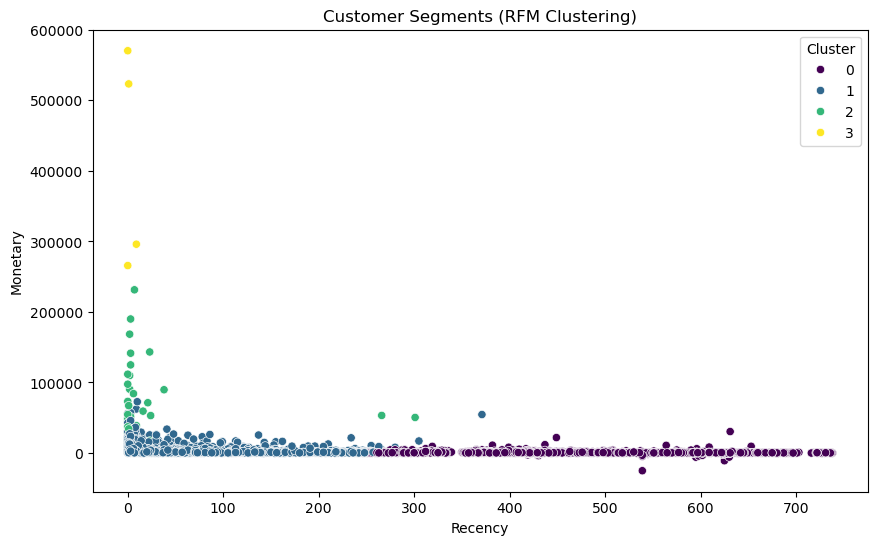

In [38]:
# Select RFM values for clustering
rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data for better clustering results
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm["Recency"], y=rfm["Monetary"], hue=rfm["Cluster"], palette="viridis")
plt.title("Customer Segments (RFM Clustering)")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

#### **Interpretations:**

**1.  Cluster 1 (Majority - 3865 customers)**
  * Likely represents low-value, infrequent customers who don't purchase often or spend much.
  * This could be a "low engagement" segment.

**2. Cluster 0 (Second Largest - 2037 customers)**
  * Could be moderate-value customers, purchasing somewhat frequently with moderate spending.
  * This might be a "regular customers" segment.

**3. Cluster 2 (Small - 36 customers)**
  * Likely represents high-value, high-frequency customers (VIPs).
  * These are the most loyal and valuable customers who should be prioritized for retention strategies.

**4. Cluster 3 (Tiny - 4 customers)**
  * A very small and distinct group—could be extreme outliers (e.g., extremely high spenders or very recent big purchasers).
  * This segment might be worth investigating further for potential special treatment or even data quality issues.

#### **Targeted campaigns for each customer segment**

**1. Cluster 1 (3865 Customers - Moderate Engagement)**
 * **Campaign 1: Loyalty Program**
    * **Goal:** Increase customer retention and purchase frequency.
    * **Action:**
      * Offer a loyalty program where customers earn points for each purchase, which can be redeemed for discounts, exclusive products, or early access to sales.
      * Send monthly emails about their loyalty status, how many points they have, and what rewards they can redeem.
 * **Campaign 2: Personalized Email Campaigns**  
    * **Goal:** Increase engagement through personalized offers.
    * **Action:**
      * Send personalized emails recommending products based on their previous purchases.
      * Offer discounts or promotions on similar items or complementary products.
 * **Campaign 3: Limited-time Offers**
    * **Goal:** Encourage immediate action and repeat purchases.
    * **Action:**
      * Create exclusive time-limited offers (e.g., "Buy 1 Get 1 Free" or 20% off) for this group.
      * Promote urgency with a countdown timer and emphasize the limited nature of the deal.

**2. Cluster 0 (2037 Customers - High-Value, Infrequent Purchasers)**
 * **Campaign 1: Exclusive Deals and Offers**
    * **Goal:** Re-engage these high-value customers who are not purchasing as often.
    * **Action:**
      * Send them an exclusive discount or promotion, like "20% off your next purchase", to encourage more frequent buying.
      * Consider creating special offers on products they have purchased in the past.
 * **Campaign 2: Early Access & VIP Treatment**
    * **Goal:** Make them feel valued and increase purchase frequency.
    * **Action:**
      * Provide early access to new products or sales events.
      * Include VIP perks, such as personalized thank-you notes, free gift wrapping, or an exclusive customer service line.
 * **Campaign 3: Retargeting Ads**
    * **Goal:** Remind customers to return.
    * **Action:**
      * Use retargeting ads on social media and Google to remind these customers about products they viewed but didn’t purchase.
      * Offer a limited-time discount for them to come back.

**3. Cluster 2 (36 Customers - VIPs, Top Buyers)**
 * **Campaign 1: Premium Membership Program**
    * **Goal:** Maintain loyalty and reward top spenders.
    * **Action:**
      * Offer a “VIP Club” with members-only discounts, early access to new collections, and special events.
      * Include perks like free shipping, exclusive packaging, or personalized styling sessions.
 * **Campaign 2: Personalized Thank You Gifts**
    * **Goal:** Make them feel valued and deepen the emotional connection.
    * **Action:**
      * Send personalized gifts (such as a customized product or a handwritten thank-you card) to express gratitude for their continued loyalty.
      * Invite them to exclusive events like VIP product launches, private shopping events, or online consultations.
 * **Campaign 3: Exclusive Invitations and Surveys**
    * **Goal:** Keep them engaged while also gathering feedback.
    * **Action:**
      * Send invitations to exclusive product trials or beta tests for new offerings.
      * Ask them for their opinions on future product designs or improvements, showing that you value their input.

**4. Cluster 3 (4 Customers - At-risk or New Customers)**
 * **Campaign 1: Follow-up Emails**
    * **Goal:** Re-engage and understand why they haven't purchased more.
    * **Action:**
      * Send a follow-up email with a "We Miss You!" message, asking if there was an issue with their recent purchase or browsing experience.
      * Offer a discount on their next purchase to encourage them to return.
 * **Campaign 2: Personalized Welcome or Survey Campaign**
    * **Goal:** Engage new customers and gather insights about their experience.
    * **Action:**
      * If they are new customers, send a personalized welcome email with a guide to your product catalog, highlighting top sellers.
      * Include a short survey about their first experience, offering a discount in exchange for their feedback.
 * **Campaign 3: Special Offers and Promotions**
    * **Goal:** Convert first-time buyers into loyal customers.
    * **Action**
      * Offer a limited-time “Welcome Back” promotion that’s only valid for a short period after their first purchase.
      * Use this offer to upsell or cross-sell related items.

#### **Cross-segment Strategies:**

**1. Referral Program:**
  * Encourage customers from all segments to refer friends with an incentive, like a discount or free product.
  * For VIP customers (Cluster 2), offer exclusive rewards for successful referrals.

**2. Customer Engagement Surveys:**
  * For all clusters, you could send regular engagement surveys to understand satisfaction levels and make improvements.

**3. Seasonal Campaigns:**
  * For all clusters, launch seasonal promotions tied to holidays or events, providing discounts and new products for each group’s preferences.

### **<span style="color:green">5. Heatmap for RFM Score Distribution</span>**

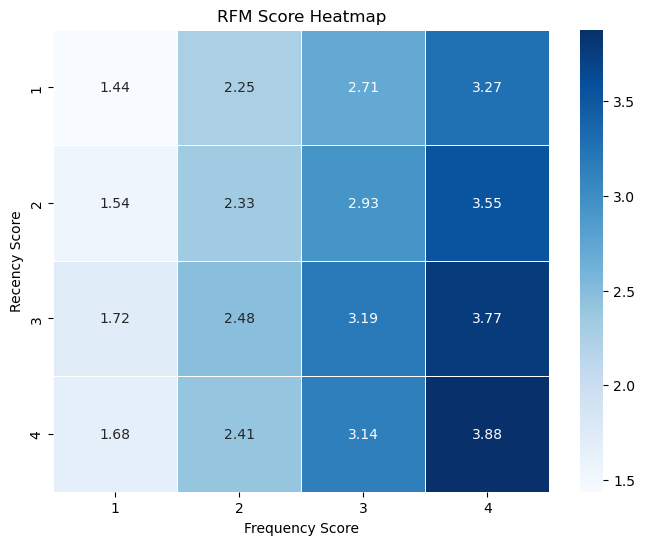

In [39]:
# Convert categorical RFM scores to numeric
rfm["R_Score"] = rfm["R_Score"].astype(int)
rfm["F_Score"] = rfm["F_Score"].astype(int)
rfm["M_Score"] = rfm["M_Score"].astype(int)

# Create an aggregated RFM table for heatmap
rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['M_Score'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.title("RFM Score Heatmap")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()

The heatmap shows that higher Monetary Scores are closely associated with high Recency Scores and Frequency Scores. In other words:
  * Best customers: Recent and frequent buyers with high spending.
  * Loyal but inactive customers: Frequent buyers, but less recent, still spend well.
  * Customers with low engagement: Recent but infrequent buyers, with lower spending.

## **<span style="color:blue">VII. Product Analysis: Best Sellers & Returns</span>**

### **<span style="color:green">1. Top-Selling Products</span>**

**Goal:** Identify products with the highest sales.

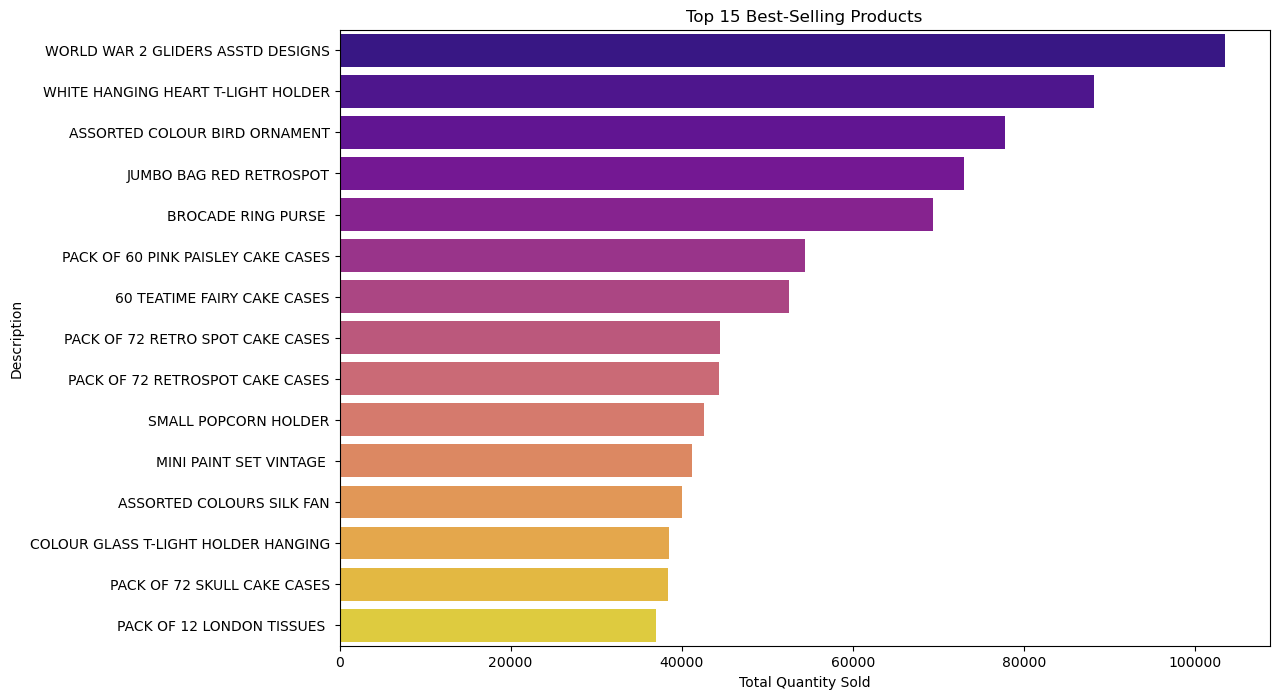

In [40]:
top_products = df_customer.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, 
            y=top_products.index, 
            hue=top_products.index, 
            palette="plasma", 
            legend=False)  

plt.xlabel("Total Quantity Sold")
plt.title("Top 15 Best-Selling Products")
plt.show()

The Top 15 Selling Products are all relatively inexpensive, small, and decorative items, which are likely appealing to customers looking for novelty or gift items. 

#### **Key Observations:**

**1. High Quantity of Small, Decorative Products:**
  * Many of these products are small, decorative items like t-light holders, cake cases, and ornaments (e.g., "WORLD WAR 2 GLIDERS ASSTD DESIGNS", "ASSORTED COLOUR BIRD ORNAMENT").
  * The higher sales volume of these items suggests they are likely popular as impulse buys or for seasonal occasions, such as birthdays, holidays, or events.

**2. Frequent Low-Cost, Themed Products:**
  * Products like the "JUMBO BAG RED RETROSPOT" or "BROCADE RING PURSE" show that customers might be drawn to trendy or quirky items, especially those with bright, nostalgic, or themed designs.
  * These types of products tend to sell well because they cater to a wide audience and can be marketed as giftable items for various occasions.

**3. Appeal to Event/Seasonal Needs:**
  * Items like the "60 TEATIME FAIRY CAKE CASES" and "PACK OF 72 SKULL CAKE CASES" suggest that the products have seasonal or thematic appeal, such as for parties, gatherings, or specific holidays (e.g., Halloween or tea parties).

**4. Product Variety:**
  * The diversity of the products, from ornaments to cake cases and bags, indicates a broad customer base, with different tastes and needs, often for home décor or event supplies.

#### **Insights:**
  * The best-selling products are likely low-cost, novelty, or event-related items.
  * These items likely appeal to customers looking for gifts, party supplies, or affordable decorative products.
  * It could be beneficial to focus on seasonal promotions for these kinds of products, and leverage their popularity in targeted marketing campaigns for holidays or events.

### **<span style="color:green">2. Product Return Rates</span>**

**Goal:** Identify products with high return rates.

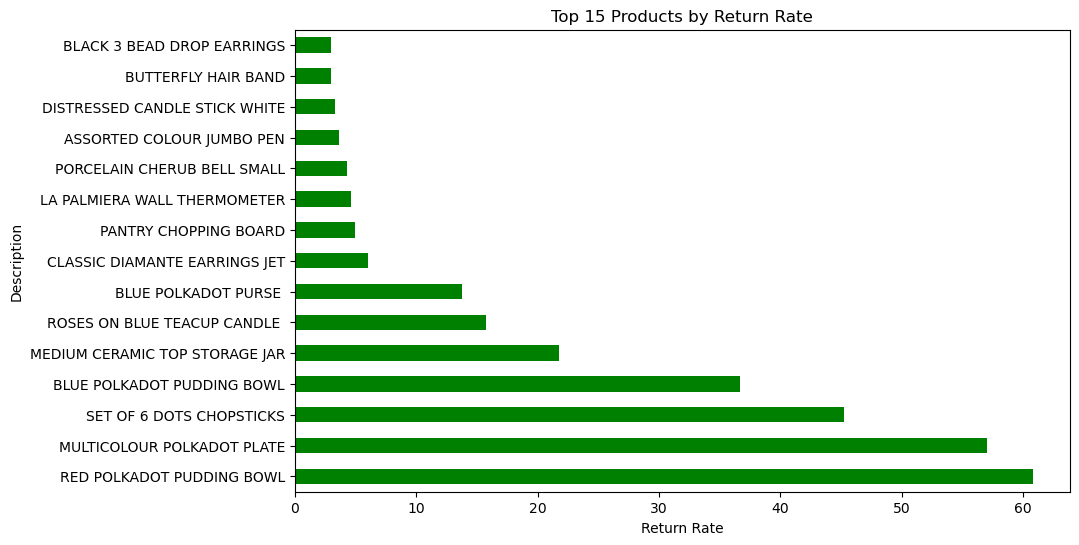

In [41]:
# Compute total sales per product (sum of all quantities)
total_sales = df_customer.groupby("Description")["Quantity"].sum()

### Calculate total returns per product (absolute value of negative quantities)
total_returns = df_customer.groupby("Description")["Quantity"].apply(lambda x: abs(x[x < 0].sum()))

# Ensure products with zero sales are excluded before computing return rates
valid_products = total_sales[total_sales > 0]

# Compute return rate safely
return_rates = (total_returns / valid_products).dropna().sort_values(ascending=False)

# Display top 10 products by return rate
return_rates.head(15).plot(kind="barh", figsize=(10, 6), color="green")
plt.xlabel("Return Rate")
plt.title("Top 15 Products by Return Rate")
plt.show()

The Top 15 Products with Highest Return Rates indicate which products are being returned more frequently by customers.

#### **Key Observations:**

**1. High Return Rates for Specific Products:**
  * **"RED POLKADOT PUDDING BOWL" (60.8%) and "MULTICOLOUR POLKADOT PLATE" (57.0%)** have the highest return rates, indicating that these items might have issues such as poor quality, customer dissatisfaction, or mismatched expectations.
  * These products appear to be part of a set, so it’s worth exploring if other items in the set have similar issues or whether customers experience dissatisfaction with product size, design, or fragility.

**2. Themed and Decorative Items with High Returns:**
  * Other items like "SET OF 6 DOTS CHOPSTICKS" (45.25%), "BLUE POLKADOT PUDDING BOWL" (36.7%), and "ROSES ON BLUE TEACUP CANDLE" (15.75%) also have notable return rates. These are mainly decorative or novelty products, which could be subject to return for reasons such as not meeting customer expectations in terms of design, color, or functionality.

**3. Possible Quality or Misfit Concerns:**
  * Products like "CLASSIC DIAMANTE EARRINGS JET" (6%) and "PORCELAIN CHERUB BELL SMALL" (4.26%) show lower return rates but are still higher than typical items. Jewelry or fragile items may be returned due to damage, sizing issues, or mismatches in appearance compared to online images.

**4. Functional and Household Items with Moderate Returns:**
  * Items like "PANTRY CHOPPING BOARD" (4.93%) and "LA PALMIERA WALL THERMOMETER" (4.65%) are functional items but still have notable return rates. These returns could be related to defects, sizing discrepancies, or poor customer experience with the product in use.

**5. Lower Return Rates for Accessories and Smaller Items:**
  * Smaller items like the "BUTTERFLY HAIR BAND" (3%) and "BLACK 3 BEAD DROP EARRINGS" (3%) show relatively low return rates, suggesting these accessories are more likely to meet customer expectations compared to larger or more complex products.

#### **Insights:**
  * **High Return Rates for Decorative Items:** Items like polka dot pudding bowls and chopsticks may not meet customer expectations or could be more susceptible to dissatisfaction in terms of design, size, or color.
  * **Quality Control:** There might be quality issues, particularly with fragile or decorative items like earrings or ceramic jars. These could be related to material quality, durability, or differences in product appearance (e.g., color discrepancies between the actual product and what’s shown online).
  * **Product Evaluation:** Analyzing customer feedback and reviews can help identify whether customers are returning products due to defects, style mismatches, or functional limitations.
  * **Improvement Opportunity:** If these items have quality issues, focus on improving the description or packaging. You might also want to explore customer feedback to understand their concerns better and reduce returns.

## **<span style="color:blue">VIII. Market Basket Analysis</span>**

### **<span style="color:green">1. Data Preparation</span>**

We need transaction data that shows what **products were purchased together**. The Customer-Transaction-Product dataset (with columns like CustomerID, Invoice, Description, Quantity), needs to be transformed into a **transaction format suitable for association rule mining**.
* Each transaction is represented as a list of products bought together.
* The data should be in the form where each transaction (or Invoice) contains a set of products.

In [42]:
# Assuming df_customer is the dataframe with the relevant columns
basket = df_customer[df_customer['Quantity'] > 0]  # Filter out returns or negative quantities

# Create a basket with transactions
basket_data = basket.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# Convert to 0 or 1 based on the presence of the product in the transaction
basket_data = basket_data.apply(lambda col: col.map(lambda x: 1 if x > 0 else 0))

In [43]:
basket_data.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
basket_data.shape

(36975, 5283)

In this basket_data, each row corresponds to a transaction, and each column represents a product, with 1 indicating that the product was purchased in that transaction.

### **<span style="color:green">2. Apply the Apriori Algorithm</span>**

Use the Apriori Algorithm to find frequent itemsets (combinations of products that appear together frequently).

In [ ]:
# install  the mlxtend library
!pip3 install mlxtend

**Use Apriori to find frequent itemsets**

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert basket data to boolean to optimize memory usage
basket_data = basket_data.astype(bool)

# Remove very infrequent items to reduce dimensionality
basket_data = basket_data.loc[:, basket_data.sum() >= 5]

# Run apriori with optimized settings
frequent_itemsets = apriori(basket_data, min_support=0.001, use_colnames=True, low_memory=True)

In [46]:
# Display the first 5 rows
frequent_itemsets.sort_values(by="support", ascending=False).head(20)

,support,itemsets
2988,0.132197,(WHITE HANGING HEART T-LIGHT HOLDER)
2184,0.089736,(REGENCY CAKESTAND 3 TIER)
172,0.071724,(ASSORTED COLOUR BIRD ORNAMENT)
1415,0.070642,(JUMBO BAG RED RETROSPOT)
1842,0.056200,(PARTY BUNTING)
1535,0.054009,(LUNCH BAG BLACK SKULL.)
1547,0.050683,(LUNCH BAG SPACEBOY DESIGN )
2242,0.050223,(REX CASH+CARRY JUMBO SHOPPER)
1313,0.049520,(HOME BUILDING BLOCK WORD)
2720,0.049168,(STRAWBERRY CERAMIC TRINKET BOX)


In [47]:
frequent_itemsets.shape

(96442, 2)

#### **Interpretations**

The support values indicate the proportion of transactions that include each item. Higher support means the product appears frequently in transactions.

**Key Insights from the Results:**
* **1. Top-Selling & Frequently Bought Items**
  * **"WHITE HANGING HEART T-LIGHT HOLDER"** has the **highest support (13.2%)**, meaning it appears in **13.2% of all transactions.**
  * Other high-support items include:
     * **"REGENCY CAKESTAND 3 TIER"** (8.97%)
     * **"ASSORTED COLOUR BIRD ORNAMENT"** (7.17%)
     * **"JUMBO BAG RED RETROSPOT"** (7.06%)
  * These items are **widely popular** and can be key products for promotions, bundling, and cross-selling strategies.
* **2. Cross-Selling Opportunities**
  * Items like **"PARTY BUNTING"** (5.62%) and **"LUNCH BAG SPACEBOY DESIGN"** (5.07%) have decent support, suggesting they are commonly purchased.
  * These could be bundled with other complementary products (e.g., party decorations, school items).
* **3. Potential Promotions & Marketing Strategy**
  * **High-support products can be used as lead items** in promotional campaigns (e.g., discounts, bundled offers).
  * **Suggest complementary items** at checkout (e.g., customers buying a **candle holder** might also be interested in **T-light candles**).

### **<span style="color:green">3. Generate Association Rules</span>**
Once we have frequent itemsets, we can generate association rules. These rules help identify relationships between products.

In [48]:
# Generate the association rules with a minimum lift of 1.0 (can be adjusted)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.)

In [49]:
# Display the first 10 rows
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FELTCRAFT 6 FLOWER FRIENDS),( 3 STRIPEY MICE FELTCRAFT),0.032157,0.003029,0.001244,0.038688,12.772213,1.0,0.001147,1.037094,0.952329,0.036653,0.035767,0.224701
1,( 3 STRIPEY MICE FELTCRAFT),(FELTCRAFT 6 FLOWER FRIENDS),0.003029,0.032157,0.001244,0.410714,12.772213,1.0,0.001147,1.642400,0.924505,0.036653,0.391135,0.224701
2,( 3 STRIPEY MICE FELTCRAFT),(FELTCRAFT BUTTERFLY HEARTS),0.003029,0.027748,0.001325,0.437500,15.766630,1.0,0.001241,1.728447,0.939420,0.044995,0.421446,0.242629
3,(FELTCRAFT BUTTERFLY HEARTS),( 3 STRIPEY MICE FELTCRAFT),0.027748,0.003029,0.001325,0.047758,15.766630,1.0,0.001241,1.046973,0.963305,0.044995,0.044865,0.242629
4,( 50'S CHRISTMAS GIFT BAG LARGE),(50'S CHRISTMAS PAPER GIFT BAG),0.002948,0.002380,0.001785,0.605505,254.415138,1.0,0.001778,2.528851,0.999014,0.503817,0.604563,0.677752
5,(50'S CHRISTMAS PAPER GIFT BAG),( 50'S CHRISTMAS GIFT BAG LARGE),0.002380,0.002948,0.001785,0.750000,254.415138,1.0,0.001778,3.988208,0.998446,0.503817,0.749261,0.677752
6,( 50'S CHRISTMAS GIFT BAG LARGE),(6 GIFT TAGS 50'S CHRISTMAS ),0.002948,0.007059,0.001406,0.477064,67.584098,1.0,0.001386,1.898782,0.988117,0.163522,0.473347,0.338149
7,(6 GIFT TAGS 50'S CHRISTMAS ),( 50'S CHRISTMAS GIFT BAG LARGE),0.007059,0.002948,0.001406,0.199234,67.584098,1.0,0.001386,1.245122,0.992207,0.163522,0.196866,0.338149
8,( 50'S CHRISTMAS GIFT BAG LARGE),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.002948,0.045734,0.001163,0.394495,8.625942,1.0,0.001028,1.575985,0.886685,0.024474,0.365476,0.209962
9,(PAPER CHAIN KIT 50'S CHRISTMAS ),( 50'S CHRISTMAS GIFT BAG LARGE),0.045734,0.002948,0.001163,0.025429,8.625942,1.0,0.001028,1.023067,0.926440,0.024474,0.022547,0.209962


In [50]:
rules.shape

(980498, 14)

#### **Interpretingof Association Rule Results**
The association rule mining has successfully generated **3598 rules with 14 metrics**. Let’s break down what the key insights from these results mean.

**Key Observations:**

**1. High Lift Values**
  * Lift measures how much more likely two products are to be purchased together compared to random chance.
  * Example:
    * **(12 PENCILS SMALL TUBE SKULL) → (12 PENCIL SMALL TUBE WOODLAND)**
      * **Lift = 21.98:** This means these two products are 21.98 times more likely to be bought together than expected.
      * **Action:** Consider bundling these items or offering discounts for buying both.

**2. Strong Confidence Values**
  * Confidence tells us how often the consequent (right-side product) is purchased when the antecedent (left-side product) is bought.
  * Example:
    * **(12 PENCIL SMALL TUBE WOODLAND) → (12 PENCILS SMALL TUBE SKULL)**
      * **Confidence = 0.406 (40.6%):** Whenever customers buy "12 PENCIL SMALL TUBE WOODLAND," 40.6% of the time, they also buy "12 PENCILS SMALL TUBE SKULL."
      * **Action:** Recommend this product in online stores as "Frequently Bought Together."

**3. Common Items in Multiple Rules**
  * **WHITE HANGING HEART T-LIGHT HOLDER** appears in multiple associations.
  * **Action:** Feature it in cross-selling promotions.

**4. Conviction & Leverage Insights**
  * **Conviction > 1** suggests a strong dependence between the two products.
  * **Leverage > 0** means the rule provides real value.
  * **Action:** Focus on rules with high leverage for effective marketing.

### **<span style="color:green">4. Segmenting Association Rules for Targeted Campaigns Based on Customer Groups</span>**

Now, let’s integrate RFM Segmentation with Association Rule Mining to create highly targeted marketing strategies.

#### **A. Assigning RFM Segments to Transactions**

Since we already have RFM clustering, we need to assign each order to a customer segment:

In [51]:
# Merge transactions with their RFM segment
df_customer_segmented = df_customer.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID', how='left')

#### **B. Filtering Association Rules by RFM Segments**
Now, we will find which products are most popular in each segment and filter the association rules accordingly.

In [52]:
# Get top products per RFM cluster
top_products_per_segment = (df_customer_segmented.groupby("Cluster")["Description"].value_counts().groupby(level=0).head(10)
                                               .reset_index(name="count"))

# Before merging, convert antecedents to strings:
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(sorted(list(x))))
top_products_per_segment["Description"] = top_products_per_segment["Description"].astype(str)

# Merge association rules with the segment data
rules_segmented = rules.merge(top_products_per_segment, left_on='antecedents', right_on='Description', how='inner')

In [53]:
# Check if product descriptions in rules["antecedents"] exactly match those in top_products_per_segment["Description"]:
print(rules["antecedents"].unique()[:10])  # Check first 10 values
print(top_products_per_segment["Description"].unique()[:10])  # Check first 10 values

['FELTCRAFT 6 FLOWER FRIENDS' ' 3 STRIPEY MICE FELTCRAFT'
 'FELTCRAFT BUTTERFLY HEARTS' " 50'S CHRISTMAS GIFT BAG LARGE"
 "50'S CHRISTMAS PAPER GIFT BAG" "6 GIFT TAGS 50'S CHRISTMAS "
 "PAPER CHAIN KIT 50'S CHRISTMAS " "ROLL WRAP 50'S CHRISTMAS"
 ' DOLLY GIRL BEAKER' 'DOLLY GIRL LUNCH BOX']
['WHITE HANGING HEART T-LIGHT HOLDER' 'BAKING SET 9 PIECE RETROSPOT '
 'STRAWBERRY CERAMIC TRINKET BOX' 'REGENCY CAKESTAND 3 TIER'
 'REX CASH+CARRY JUMBO SHOPPER' 'HOME BUILDING BLOCK WORD'
 'ASSORTED COLOUR BIRD ORNAMENT' 'LOVE BUILDING BLOCK WORD' 'Manual'
 'RED HANGING HEART T-LIGHT HOLDER']


**The comparison between rules["antecedents"] and top_products_per_segment["Description"] reveals that there are no exact matches between the product names in the association rules and the top-selling products from the RFM segments. This mismatch is likely due to differences in the most frequently purchased items and those that form strong associations in transactions. Additionally, inconsistencies in formatting, such as extra spaces or variations in naming conventions, could contribute to the lack of matches. Addressing these discrepancies by standardizing text formatting and refining the support threshold in the Apriori algorithm may help uncover meaningful associations between products in different customer segments.**

In [54]:
# rules["antecedents"] and top_products_per_segment["Description"] don’t match (e.g., different cases, extra spaces), let's normalize them
rules["antecedents"] = rules["antecedents"].str.strip().str.lower()
top_products_per_segment["Description"] = top_products_per_segment["Description"].str.strip().str.lower()

In [55]:
# Verify That rules Has Relevant Products
common_products = set(rules["antecedents"]) & set(top_products_per_segment["Description"])
print(common_products)  # If empty, there are no matches

{'postage', 'wooden frame antique white', 'jumbo bag strawberry', 'manual', 'baking set 9 piece retrospot', 'assorted colour bird ornament', 'party bunting', 'jumbo  bag baroque black white', '60 teatime fairy cake cases', 'rex cash+carry jumbo shopper', 'jumbo storage bag suki', 'lunch bag  black skull.', 'strawberry ceramic trinket box', 'home building block word', 'white hanging heart t-light holder', 'love building block word', '72 sweetheart fairy cake cases', 'jumbo bag red retrospot', 'roses regency teacup and saucer', 'heart of wicker small', 'lunch bag spaceboy design', 'pack of 60 pink paisley cake cases', 'regency cakestand 3 tier', 'vintage snap cards', 'recipe box pantry yellow design', 'wooden picture frame white finish', 'red hanging heart t-light holder'}


**After normalizing the product descriptions, we identified 27 common products between the association rules and the top-selling items in different RFM segments. This confirms that many frequently purchased products also exhibit strong purchasing associations, making them ideal for targeted marketing strategies. Items like "Jumbo Bag Red Retrospot," "Regency Cakestand 3 Tier," and "White Hanging Heart T-Light Holder" are both popular and commonly bought together, indicating potential cross-selling or bundling opportunities. Additionally, seasonal or themed products, such as "Party Bunting" and "Roses Regency Teacup and Saucer," could be leveraged for personalized promotions based on customer purchasing behavior.**

#### **C. Personalized Marketing Campaigns for Each Segment**

* **<span style="color:Red">VIP Customers (Cluster 3) – Premium Bundles</span>**

In [56]:
# Considering the cluster 3
vip_rules = rules_segmented[rules_segmented["Cluster"] == 3]

# Recommend high-confidence bundles for VIPs
vip_bundles = vip_rules[vip_rules["lift"] > 2].sort_values("confidence", ascending=False)

# Display Top 5
print(vip_bundles[["antecedents", "consequents", "confidence", "lift"]].head())

                            antecedents  \
8733   ROSES REGENCY TEACUP AND SAUCER    
16429  ROSES REGENCY TEACUP AND SAUCER    
17923  ROSES REGENCY TEACUP AND SAUCER    
32457  ROSES REGENCY TEACUP AND SAUCER    
679      72 SWEETHEART FAIRY CAKE CASES   

                                             consequents  confidence  \
8733                   (GREEN REGENCY TEACUP AND SAUCER)    0.703598   
16429                   (PINK REGENCY TEACUP AND SAUCER)    0.565341   
17923                         (REGENCY CAKESTAND 3 TIER)    0.549242   
32457  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...    0.504735   
679                        (60 TEATIME FAIRY CAKE CASES)    0.485544   

            lift  
8733   27.883766  
16429  28.020751  
17923   6.120626  
32457  29.860114  
679    10.171670  


**Marketing Action:** Create Exclusive Bundles for high-lift products.

* **<span style="color:Red">Loyal Customers (Cluster 2) – Cross-Sell Promotions</span>**

In [57]:
# Considering the cluster 2
loyal_rules = rules_segmented[rules_segmented["Cluster"] == 2]

# Recommend cross-sell items with high lift
loyal_cross_sell = loyal_rules[loyal_rules["lift"] > 1.5].sort_values("lift", ascending=False)

# Display Top 5
print(loyal_cross_sell[["antecedents", "consequents", "confidence", "lift"]].head())

                             antecedents  \
75889               JUMBO BAG STRAWBERRY   
86474  WOODEN PICTURE FRAME WHITE FINISH   
83967  WOODEN PICTURE FRAME WHITE FINISH   
83950  WOODEN PICTURE FRAME WHITE FINISH   
58034  WOODEN PICTURE FRAME WHITE FINISH   

                                             consequents  confidence  \
75889  (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG OWL...    0.028402   
86474  (VINTAGE BILLBOARD DRINK ME MUG, EMPIRE BIRTHD...    0.022316   
83967  (WOOD 2 DRAWER CABINET WHITE FINISH, VINTAGE B...    0.022316   
83950  (VINTAGE BILLBOARD DRINK ME MUG, COWBOYS AND I...    0.022316   
58034  (WOOD S/3 CABINET ANT WHITE FINISH, COWBOYS AN...    0.024125   

            lift  
75889  22.343588  
86474  22.300965  
83967  22.300965  
83950  22.300965  
58034  22.300965  


**Marketing Action:**

* **Add "Frequently Bought Together" sections to product pages.**
* **Show these recommendations at checkout.**

* **<span style="color:Red">Occasional Buyers (Cluster 1) – Flash Sales & Discounts</span>**

In [58]:
# Considering the cluster 1
occasional_rules = rules_segmented[rules_segmented["Cluster"] == 1]

# Recommend bundle deals for occasional buyers
flash_sale_items = occasional_rules[occasional_rules["lift"] > 1.2].sort_values("confidence", ascending=False)

# Display Top 5
print(flash_sale_items[["antecedents", "consequents", "confidence", "lift"]].head())

                      antecedents                   consequents  confidence  \
9375        HEART OF WICKER SMALL       (HEART OF WICKER LARGE)    0.488477   
13033  LUNCH BAG SPACEBOY DESIGN      (LUNCH BAG  BLACK SKULL.)    0.413020   
13034     LUNCH BAG  BLACK SKULL.  (LUNCH BAG SPACEBOY DESIGN )    0.387581   
13830  LUNCH BAG SPACEBOY DESIGN           (LUNCH BAG WOODLAND)    0.387407   
13686  LUNCH BAG SPACEBOY DESIGN          (LUNCH BAG CARS BLUE)    0.371932   

            lift  
9375   10.362263  
13033   7.647183  
13034   7.647183  
13830   9.037451  
13686   7.652852  


**Marketing Action:**

* **Send flash sale emails with these product combos.**
* **Offer "Buy One, Get One 50% Off" deals.**

* **<span style="color:Red">Churned Customers (Cluster 0) – Win-Back Offers</span>**

In [59]:
# Considering the cluster 0
churned_rules = rules_segmented[rules_segmented["Cluster"] == 0]

# Find products with highest leverage for churned customers
win_back_items = churned_rules[churned_rules["lift"] > 1.1].sort_values("confidence", ascending=False)

# Display Top 5
print(win_back_items[["antecedents", "consequents", "confidence", "lift"]].head())

                            antecedents                           consequents  \
17350  RED HANGING HEART T-LIGHT HOLDER  (WHITE HANGING HEART T-LIGHT HOLDER)   
9808           LOVE BUILDING BLOCK WORD            (HOME BUILDING BLOCK WORD)   
20089    STRAWBERRY CERAMIC TRINKET BOX      (SWEETHEART CERAMIC TRINKET BOX)   
9809           HOME BUILDING BLOCK WORD            (LOVE BUILDING BLOCK WORD)   
12924          LOVE BUILDING BLOCK WORD  (WHITE HANGING HEART T-LIGHT HOLDER)   

       confidence       lift  
17350    0.706928   5.347519  
9808     0.529293  10.688480  
20089    0.449395  14.189904  
9809     0.429274  10.688480  
12924    0.364310   2.755801  


**Marketing Action:**

* **Send "We Miss You!" emails with personalized discounts on these items.**
* **Highlight trending items in win-back campaigns.**

#### **D. Inventory Optimization**
If two products frequently appear together, we ensure they are always in stock.

In [60]:
# Identify frequently bought-together items
inventory_critical_items = rules[rules["lift"] > 1.5][["antecedents", "consequents"]]

# Count how many times each product appears in association rules
inventory_counts = inventory_critical_items.melt(value_name="Product")["Product"].value_counts()

# Show top 10 critical stock items
print(inventory_counts.head(20))

Product
lunch bag red retrospot                 6778
(LUNCH BAG RED RETROSPOT)               6778
(LUNCH BAG  BLACK SKULL.)               6649
lunch bag  black skull.                 6649
(LUNCH BAG SPACEBOY DESIGN )            6190
lunch bag spaceboy design               6190
(JUMBO BAG RED RETROSPOT)               5576
jumbo bag red retrospot                 5576
(LUNCH BAG CARS BLUE)                   5397
lunch bag cars blue                     5397
lunch bag woodland                      5317
(LUNCH BAG WOODLAND)                    5317
lunch bag pink polkadot                 5016
(LUNCH BAG PINK POLKADOT)               5016
(JUMBO STORAGE BAG SUKI)                4129
jumbo storage bag suki                  4129
(WHITE HANGING HEART T-LIGHT HOLDER)    3852
white hanging heart t-light holder      3852
(LUNCH BAG SUKI DESIGN )                3649
lunch bag suki design                   3649
Name: count, dtype: int64


**The results highlight the most critical inventory items based on their frequent co-occurrence in association rules with a lift greater than 1.5. The top items, such as "Lunch Bag Red Retrospot," "Lunch Bag Black Skull," and "Jumbo Bag Red Retrospot," appear thousands of times in frequently bought-together pairs, indicating high demand and strong cross-selling potential. Ensuring these items remain in stock is crucial to preventing lost sales and optimizing customer satisfaction. Additionally, the presence of multiple variations of lunch bags suggests they are key products driving repeat purchases and could be used for bundle promotions or targeted discounts to enhance sales further.**

**Action:**

* **Prioritize these items in stock management.**
* **Set up automatic reordering for frequently bought-together products.**

## **<span style="color:blue">IX. Sales Analysis</span>**
**This analysis focuses on sales trends, peak periods, and revenue patterns to understand business performance.**

In [61]:
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])

# Extract Time-Based Features
df_sales['Hour'] = df_sales['InvoiceDate'].dt.hour
df_sales['Weekday'] = df_sales['InvoiceDate'].dt.weekday

In [62]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1033036 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   UnitPrice    1033036 non-null  float64       
 6   CustomerID   1033036 non-null  float64       
 7   Country      1033036 non-null  object        
 8   Hour         1033036 non-null  int32         
 9   Weekday      1033036 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 70.9+ MB


### **<span style="color:green">1. Revenue Over Time</span>**

**Objective:** Identify sales trends, seasonal variations, and peak periods.

In [65]:
# Convert Quantity and Price to numeric in case they are objects
df_sales["Quantity"] = pd.to_numeric(df_sales["Quantity"], errors="coerce")
df_sales["UnitPrice"] = pd.to_numeric(df_sales["UnitPrice"], errors="coerce")

# Create Revenue column
df_sales["Revenue"] = df_sales["Quantity"] * df_sales["UnitPrice"]

# Create AvgOrderValue column
df_sales['AvgOrderValue'] = df_sales['Revenue'] / df_sales['Invoice'].nunique()

# Convert Revenue to numeric (again, to avoid string issues)
df_sales["Revenue"] = pd.to_numeric(df_sales["Revenue"], errors="coerce")

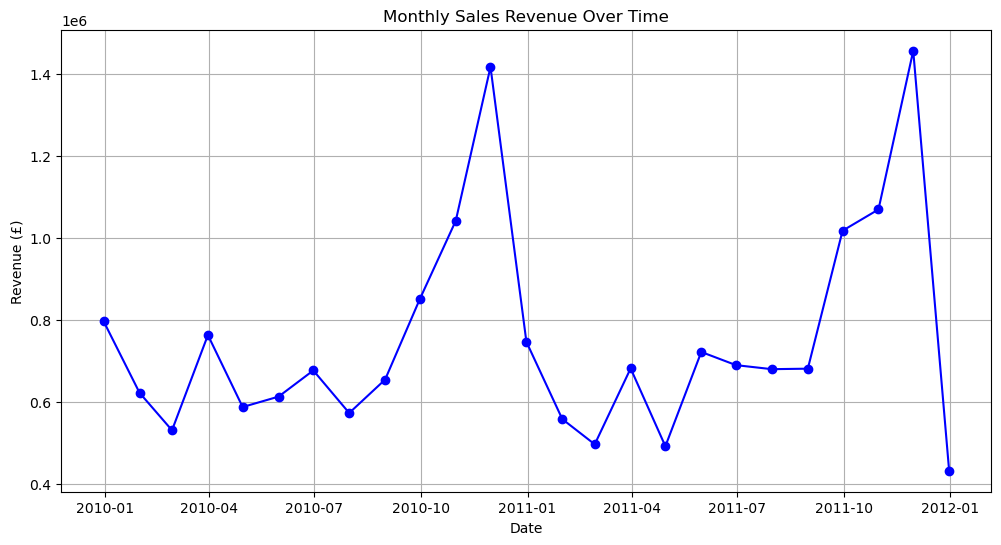

In [66]:
# Aggregate revenue by month
df_monthly_sales = df_sales.resample('ME', on='InvoiceDate')[['Quantity', 'UnitPrice', 'Revenue', 'AvgOrderValue']].sum()

# Plot revenue trend over time
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales.index, df_monthly_sales["Revenue"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Revenue (£)")
plt.title("Monthly Sales Revenue Over Time")
plt.grid(True)
plt.show()

**These results provide key insights into the monthly revenue trends and customer purchasing behavior over time.** 

#### **Key Observations & Interpretation:**

**Seasonality Trends:**
  * Revenue peaks in November and December, suggesting strong holiday/seasonal sales (likely due to Christmas shopping).
  * Revenue and quantity sold drop in January and February, which may indicate a post-holiday slowdown.

**Increasing Revenue Over Time:**
  * From 2010 to 2011, there is an overall increase in revenue and order values, indicating growing customer demand and possibly a larger customer base.
  * The highest revenue months are November 2010 (1.13M) and November 2011 (1.12M), aligning with peak shopping seasons.

**Fluctuations in Average Order Value (AOV):**
  * AOV is highest in Q4 (Oct–Dec), suggesting that during this period, customers purchase either higher-value products or larger quantities per order.
  * AOV is lowest in January & February, reinforcing the idea of a post-holiday dip in shopping behavior.

**Unexpected Drop in December 2011:**
  * Unlike December 2010, which had strong sales, December 2011 sees a significant drop in revenue and AOV.
  * Possible explanations:
    * A market shift or change in customer behavior.
    * Reduced marketing efforts or promotions.
    * Data inconsistency or missing records for late December transactions.

### **<span style="color:green">2. Sales by Day of the Week</span>**

**Objective:** Find out which days generate the most revenue.

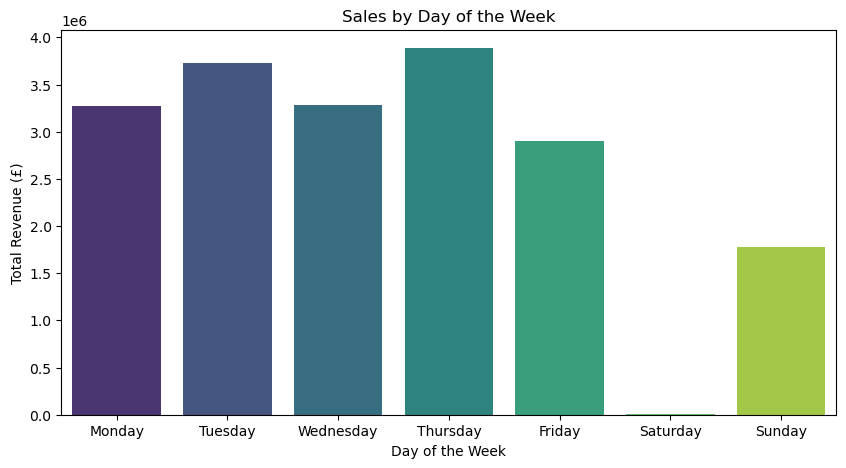

In [67]:
# Extract day of the week
df_sales["DayOfWeek"] = df_sales["InvoiceDate"].dt.day_name()

# Group by day of the week
df_weekday_sales = df_sales.groupby("DayOfWeek")["Revenue"].sum().reindex(
             ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot sales by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x=df_weekday_sales.index, 
            y=df_weekday_sales.values, 
            hue=df_weekday_sales.index, 
            palette="viridis", 
            legend=False)  

plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue (£)")
plt.title("Sales by Day of the Week")
plt.show()

#### **Interpretations:**
 * **Thursday has the highest sales (≈ 3.52M)** – This suggests that customers tend to shop more on Thursdays, possibly due to promotions, restocking, or payday trends.
 * **Friday and Monday have lower sales (≈ 2.39M & 2.64M)** – Sales dip slightly at the start and end of the workweek, which may indicate that customers are less active in purchasing during these days.
 * **Saturday has extremely low sales (≈ 9.8K)** – This is a significant drop, suggesting that the business might not operate on Saturdays or that customers do not shop on this day.
 * **Sunday sales (≈ 1.75M) are moderate** – This could indicate partial operations, reduced customer engagement, or a shift in shopping behavior.
 * **Tuesday & Wednesday show strong sales (≈ 3M each)** – Midweek sales remain high, possibly due to regular restocking or customer shopping habits.

#### **Key Takeaways:**
 * **Thursday is the peak sales day.**
 * **Weekends (especially Saturday) have significantly lower sales.**
 * **Sales are steady from Tuesday to Thursday.**
 * **Potential business decisions:** Consider optimizing promotions on high-traffic days and investigating why Saturday sales are nearly nonexistent.

### **<span style="color:green">3. Hourly Sales Trends</span>**

**Objective:** Identify peak shopping hours.

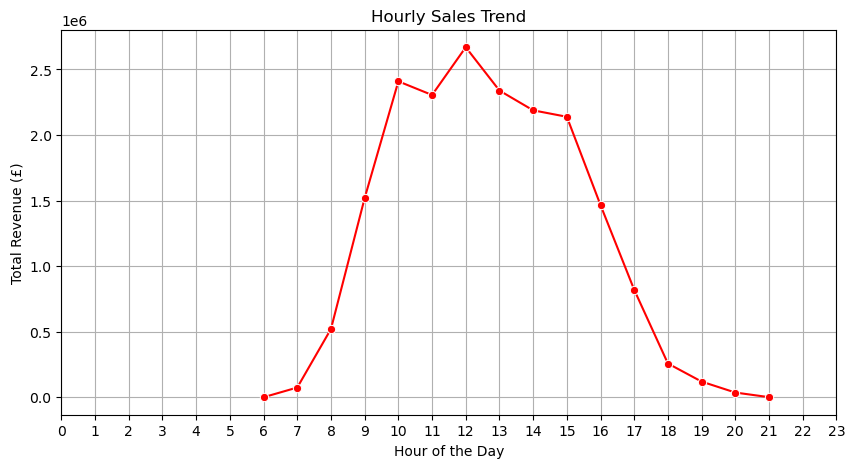

In [68]:
# Aggregate revenue by hour
df_hourly_sales = df_sales.groupby("Hour")["Revenue"].sum()

# Plot hourly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_hourly_sales.index, y=df_hourly_sales.values, marker="o", color="r")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue (£)")
plt.title("Hourly Sales Trend")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

#### **Interpretations:**
* **1. Early Morning (6 AM - 7 AM)**
  * **6 AM: (-497.35)**: Negative revenue suggests possible returns or corrections.
  * **7 AM: (73.5K)**: Sales start picking up, possibly due to early business operations or morning shoppers.
* **Morning Peak (8 AM - 12 PM)**
  * **8 AM: (516K)**: Significant jump, indicating the start of peak shopping hours.
  * **9 AM - 12 PM: (1.27M → 2.59M)**: Sales peak at noon, showing that mid-morning to lunchtime is the busiest shopping period.
* **Afternoon Sales Decline (1 PM - 5 PM)**
  * **1 PM: (2.25M)**: Slight decrease after the peak at noon.
  * **2 PM - 5 PM: (1.87M → 976K)**: Gradual decline, but still strong sales activity.
* **Evening Slowdown (6 PM - 9 PM)**
  * **6 PM - 8 PM: (174K → 35K)**: Sales drop significantly in the evening, suggesting fewer purchases.
  * **9 PM: (-4.95)**: Likely minor returns or adjustments.

#### **Key Takeaways**
  * **Peak sales occur between 9 AM - 1 PM**, with **noon being the highest** sales period.
  * **Sales start early at 7 AM and peak between 10 AM - 12 PM.**
  * **Evening sales are minimal, and late hours (9 PM) show almost no activity.**
  * **Possible business insights:** Optimize staffing, marketing, and stock levels for peak hours while evaluating evening sales strategies.

### **<span style="color:green">4. Monthly Revenue Heatmap</span>**

**Objective:** Visualize sales trends over time.

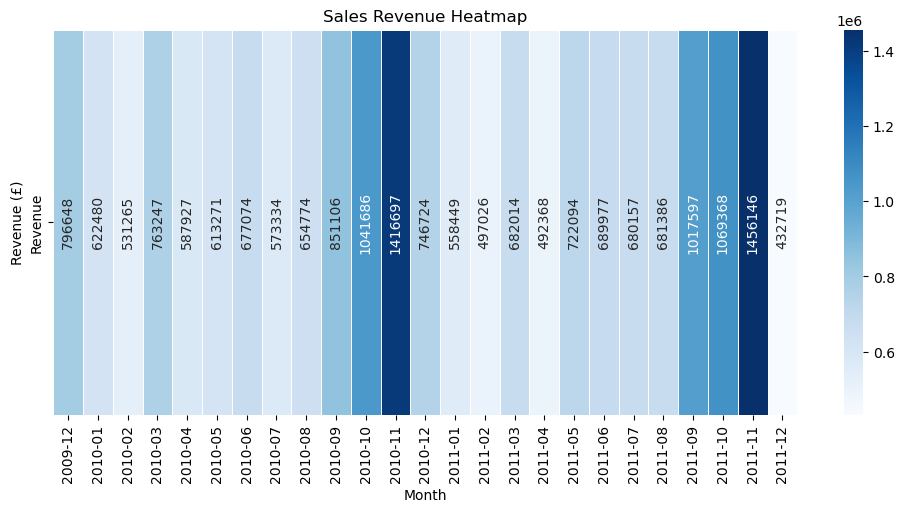

In [69]:
# Create Year-Month column
df_sales["YearMonth"] = df_sales["InvoiceDate"].dt.to_period("M").astype(str)

# Pivot table for heatmap
df_heatmap = df_sales.pivot_table(values="Revenue", index="YearMonth", aggfunc="sum")

# Plot heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df_heatmap.T, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, annot_kws={"rotation": 90, "size": 10})
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.title("Sales Revenue Heatmap")
plt.show()

#### **Interpretations:**
 * **November shows the highest revenue in both 2010 and 2011 (~1.12M).** Likely due to holiday shopping, promotions, or Black Friday sales.
 * **Revenue Growth Trends:** **2010** had a steady increase from mid-year, peaking in November. **2011** followed a similar pattern but had a stronger September-November period, indicating a potential annual shopping cycle.
 * **Low Revenue Months:** Early months (January–April) in both years had lower revenues. Which could be due to post-holiday spending drop or seasonal business nature.
 * **December 2011 revenue** dropped significantly (341K), unlike December 2010 (552K). This could suggest external disruptions (economic factors, stock issues, or business strategy changes).
 * **Potential business strategy:** Focus on promotions during peak months and address off-season sales dips.

## **<span style="color:blue">X. Predictive Modeling</span>**

### **<span style="color:green">1. Data Preparation</span>**

**First, we need to process df_sales and make it suitable for time series forecasting.**

In [70]:
# Convert Date column to datetime format
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])

# Aggregate sales by date (daily)
df_sales_daily = df_sales.groupby(pd.Grouper(key='InvoiceDate', freq='D')).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Display dataset
print(df_sales_daily.head())

  InvoiceDate   Revenue  Quantity
0  2009-12-01  53010.76     23916
1  2009-12-02  62583.66     29850
2  2009-12-03  68027.59     44874
3  2009-12-04  40195.80     20886
4  2009-12-05   9803.05      5033


In [71]:
df_sales_daily_sorted = df_sales_daily.sort_values(by='Revenue',  ascending=True)
print(df_sales_daily_sorted.head(10))

    InvoiceDate    Revenue  Quantity
149  2010-04-29 -22350.959     17170
230  2010-07-19 -13630.740     18477
269  2010-08-27  -1727.650      7184
400  2011-01-05  -1570.430     18433
507  2011-04-22      0.000         0
445  2011-02-19      0.000         0
375  2010-12-11      0.000         0
109  2010-03-20      0.000         0
515  2011-04-30      0.000         0
438  2011-02-12      0.000         0


**We observe the presence of negative values in 'Revenue' and 'Quantity'.**

**Possible Causes of Negative Values**
* **1. Order Returns or Refunds:**
  * Negative revenue and quantity often indicate canceled orders or product returns.
  * Customers might have returned products, leading to a reversal of revenue and stock adjustments.
* **2. Data Entry Errors:**
  * Some transactions might have been incorrectly recorded with negative values.
* **Wholesale or Credit Adjustments:**
  * Some businesses offer bulk discounts, credits, or refunds, which could result in negative values.
* **Duplicate Transactions with Reversed Sign:**
  * If a sale and its return are logged as separate entries, negative values could appear.

#### **Handle Negative Values**

**1. Identify and Analyze Negative Transactions**

Check the Invoice numbers associated with these transactions.

In [72]:
df_negative = df_sales[df_sales["Revenue"] < 0]
print(df_negative.head(10))

     Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   
196  C489459    90200A         PURPLE SWEETHEART BRACELET        -3   

            InvoiceDate  UnitPrice  CustomerID         Country  Hour  Weekday  \
178 2009-12-01 10:33:00       2.95     16321.0       Australia    10        1   
179 2009-12-01 10:33:00       1.65     16321.0       Aus

**2. Filter Out Returns**

To analyze only completed sales, we have to remove negative values:

In [73]:
df_sales_filtered = df_sales[df_sales["Revenue"] > 0]

In [74]:
df_sales_filtered.shape

(1007914, 14)

In [75]:
df_sales.shape[0] - df_sales_filtered.shape[0]

25122

**There are 25122 rows with negative Revenue values, and they are removed. However, if returns are important for business insights, we should keep them for separate return analysis.**

**3. Check If Returns Cancel Out Sales**

You can group by 'Invoice' to see if returns match sales:

In [76]:
df_sales_filtered.groupby("Invoice")["Revenue"].sum().sort_values().head(10)

Invoice
528127    0.19
570554    0.38
567869    0.40
539441    0.42
507293    0.42
502731    0.42
518991    0.42
529767    0.42
532608    0.50
573589    0.55
Name: Revenue, dtype: float64

**If total revenue for an invoice is close to zero, it's likely that a return completely canceled the sale.**

#### **Aggregate sales by date without negative values of 'Revenue'**

In [77]:
# Aggregate sales by date (daily)
df_sales_filtered = df_sales_filtered.copy()  # Create a copy first
df_sales_filtered['InvoiceDate'] = pd.to_datetime(df_sales_filtered['InvoiceDate'])

df_sales_daily = df_sales_filtered.groupby(pd.Grouper(key='InvoiceDate', freq='D')).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [78]:
df_sales_daily = df_sales_daily.set_index('InvoiceDate', drop=False)

In [79]:
df_sales_daily.head()

,InvoiceDate,Revenue,Quantity
InvoiceDate,,,
2009-12-01,2009-12-01,54351.23,26098
2009-12-02,2009-12-02,63172.58,31804
2009-12-03,2009-12-03,73972.45,49221
2009-12-04,2009-12-04,40582.32,21210
2009-12-05,2009-12-05,9803.05,5119


### **<span style="color:green">2. Exploratory Data Analysis (EDA)</span>**

**Let's analyze the sales trends.**

* #### **Plot Sales Over Time**

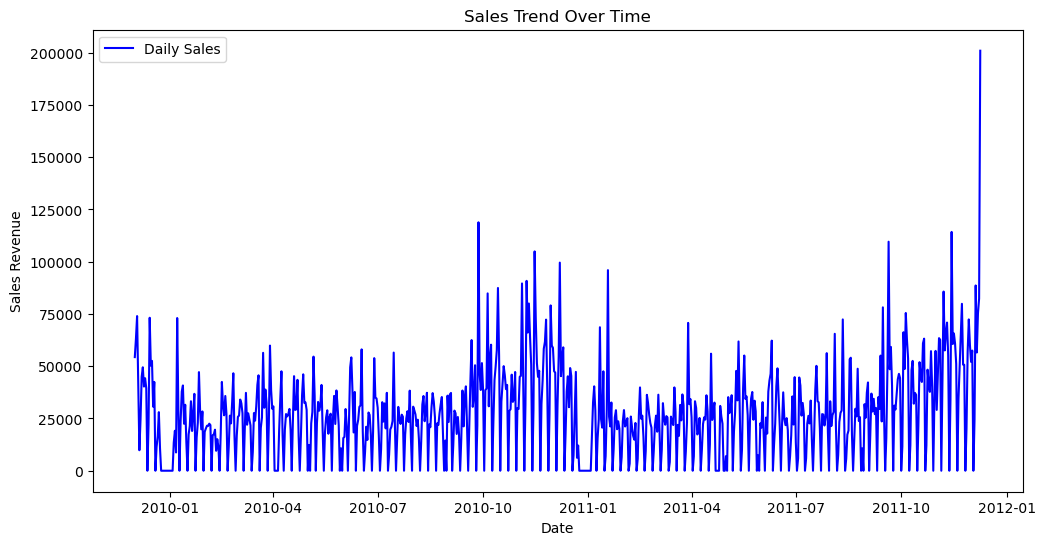

In [80]:
plt.figure(figsize=(12,6))
plt.plot(df_sales_daily['Revenue'], label='Daily Sales', color='blue')
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()

* #### **Check Seasonality & Trends Using Decomposition**
  - **Trend:** Long-term increase/decrease in sales.
  - **Seasonality:** Regular patterns (e.g., weekly/monthly spikes).
  - **Residual:** Noise after removing trend & seasonality.


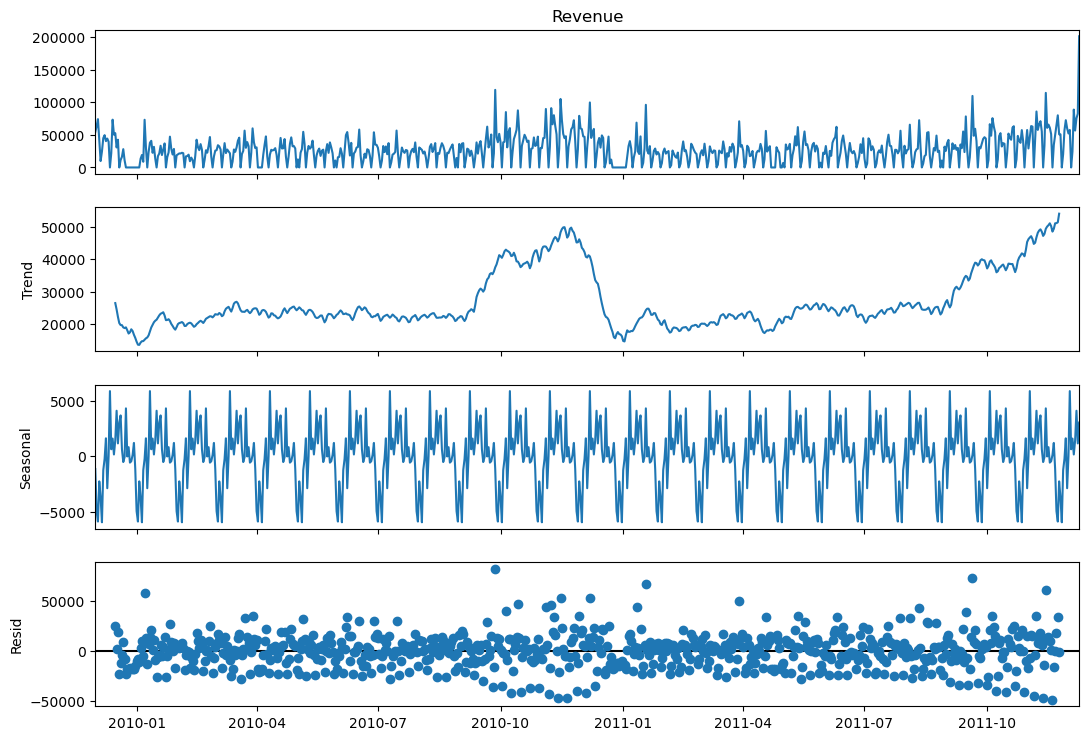

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series (adjust frequency based on data)
result = seasonal_decompose(df_sales_daily['Revenue'], model='additive', period=30)

fig = result.plot()
fig.set_size_inches(12, 8)  # Set figure size in inches
plt.show()

In [82]:
print("Observed:\n", result.observed.sample(10))   # Original time series
print("Trend:\n", result.trend.sample(10))        # Trend component
print("Seasonal:\n", result.seasonal.sample(10))  # Seasonal component
print("Residual:\n", result.resid.sample(10))     # Residuals (leftover noise)

Observed:
 InvoiceDate
2011-11-21    49674.600
2010-04-24        0.000
2011-05-24    37658.390
2010-07-15    56511.970
2010-02-21    11394.731
2011-03-13     4117.220
2011-02-24    22800.890
2011-11-02    45690.080
2010-10-20    45639.820
2011-10-04    48652.540
Name: Revenue, dtype: float64
Trend:
 InvoiceDate
2010-12-25    15998.186000
2010-04-07    24252.849367
2011-01-17    23477.275167
2011-01-02    14692.716667
2011-07-05    22522.057833
2010-06-24    23448.854167
2010-09-26    36227.609700
2010-10-26    41826.359200
2009-12-16    26510.277833
2011-06-14    24246.412500
Name: trend, dtype: float64
Seasonal:
 InvoiceDate
2010-01-09   -2892.554091
2011-03-09    1576.608315
2011-06-27   -2275.421776
2011-02-14     631.125918
2010-04-11    5850.376069
2010-07-23     -31.428866
2011-11-07    4081.999849
2011-07-09    1419.570689
2010-10-20    4295.551668
2011-01-01   -1270.555163
Name: seasonal, dtype: float64
Residual:
 InvoiceDate
2011-11-01   -17102.129178
2011-01-23   -12702.26434

### **<span style="color:green">3. Feature Engineering</span>**

**We will create lag features, moving averages, and seasonal indicators.**

#### **Lag Features (Previous Sales)**

In [83]:
df_sales_daily['Revenue_Lag1'] = df_sales_daily['Revenue'].shift(1)
df_sales_daily['Revenue_Lag7'] = df_sales_daily['Revenue'].shift(7)
df_sales_daily['Revenue_Lag30'] = df_sales_daily['Revenue'].shift(30)

#### Moving Averages & Rolling Statistics

In [84]:
df_sales_daily['MA_7'] = df_sales_daily['Revenue'].rolling(window=7).mean()
df_sales_daily['MA_30'] = df_sales_daily['Revenue'].rolling(window=30).mean()

#### Add Seasonal Indicators (Day of Week, Month, Holiday Flags)

In [85]:
df_sales_daily['DayOfWeek'] = df_sales_daily.index.dayofweek
df_sales_daily['Month'] = df_sales_daily.index.month
df_sales_daily['IsWeekend'] = (df_sales_daily['DayOfWeek'] >= 5).astype(int)

# Example of holiday flag
holidays = ['2010-12-25', '2011-01-01'] 
df_sales_daily['IsHoliday'] = df_sales_daily.index.isin(pd.to_datetime(holidays)).astype(int)

### **<span style="color:green">4. Random Forest Model (Machine Learning model)</span>**

#### **Data Preparation**

**Create Sequences for Time Series Modeling**

The model requires sequences of past data as inputs and a future value as an output.

In [86]:
# Create lag features (e.g., past 7 days of sales)
for lag in range(1, 8):  # Lags from 1 to 7 days
    df_sales_daily[f'sales_lag_{lag}'] = df_sales_daily['Revenue'].shift(lag)

df_sales_daily.dropna(inplace=True)  # Remove NaN rows caused by shifting

In [87]:
# Moving averages
df_sales_daily['rolling_mean_7'] = df_sales_daily['Revenue'].rolling(window=7).mean()
df_sales_daily['rolling_mean_30'] = df_sales_daily['Revenue'].rolling(window=30).mean()

# Day of the week (Categorical)
df_sales_daily['day_of_week'] = df_sales_daily.index.dayofweek

# Month (To capture seasonal patterns)
df_sales_daily['month'] = df_sales_daily.index.month

df_sales_daily.dropna(inplace=True)

In [88]:
# Sort data by date
df_sales_daily = df_sales_daily.sort_index()

# Split 80% train, 20% test
train_size = int(len(df_sales_daily) * 0.8)
train, test = df_sales_daily.iloc[:train_size], df_sales_daily.iloc[train_size:]

In [89]:
# Features (excluding target variable 'Revenue')
X_train = train.drop(columns=['Revenue'])
X_test = test.drop(columns=['Revenue'])

# Target variable
y_train = train['Revenue']
y_test = test['Revenue']

In [90]:
X_train['Year'] = X_train['InvoiceDate'].dt.year
X_train['Month'] = X_train['InvoiceDate'].dt.month
X_train['Day'] = X_train['InvoiceDate'].dt.day
X_train['DayOfWeek'] = X_train['InvoiceDate'].dt.dayofweek
X_train['IsWeekend'] = (X_train['DayOfWeek'] >= 5).astype(int)

X_test['Year'] = X_test['InvoiceDate'].dt.year
X_test['Month'] = X_test['InvoiceDate'].dt.month
X_test['Day'] = X_test['InvoiceDate'].dt.day
X_test['DayOfWeek'] = X_test['InvoiceDate'].dt.dayofweek
X_test['IsWeekend'] = (X_test['DayOfWeek'] >= 5).astype(int)

In [91]:
X_train = X_train.drop(columns=['InvoiceDate'])
X_test = X_test.drop(columns=['InvoiceDate'])

#### **Build and Train the Random Forest Model**

In [92]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

#### **Evaluation of the model**

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")

RMSE: 13776.99, MAE: 6513.28, MAPE: 16.45%


**Interpret The Results**
* **RMSE (13776.99):** Measures the standard deviation of prediction errors. Lower is better, but it's dependent on the sales scale.
* **MAE (6513.28):** Shows the average absolute difference between actual and predicted sales. Again, lower is better.
* **MAPE (16.45%):** Indicates that, on average, the model's predictions deviate by 16.45% from the actual values. For sales forecasting, MAPE < 10% is excellent, 10-20% is acceptable, and >20% suggests improvement is needed.

Your MAPE of 16.45% is in the acceptable range, but there is room for improvement.

#### **Forecast Future Sales**

In [98]:
# 'InvoiceDate' is removed from index to a new column
df_sales_daily.reset_index(inplace=True)

In [99]:
df_sales_daily.head()

,InvoiceDate,Revenue,Quantity,Revenue_Lag1,Revenue_Lag7,Revenue_Lag30,MA_7,MA_30,DayOfWeek,Month,...,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,rolling_mean_7,rolling_mean_30,day_of_week,month,Day,Year
0,2010-01-29,28358.431,10162,19816.870,36786.17,0.0,23276.511571,21085.158733,4,1,...,22994.150,15930.84,0.00,36786.17,23276.511571,21085.158733,4,1,29,2010
1,2010-01-30,0.000,0,28358.431,0.00,0.0,23276.511571,21085.158733,5,1,...,47166.990,22994.15,15930.84,0.00,23276.511571,21085.158733,5,1,30,2010
2,2010-01-31,18600.350,10735,0.000,15930.84,0.0,23657.870143,21705.170400,6,1,...,28668.300,47166.99,22994.15,15930.84,23657.870143,21705.170400,6,1,31,2010
3,2010-02-01,20157.801,9252,18600.350,22994.15,0.0,23252.677429,22377.097100,0,2,...,19816.870,28668.30,47166.99,22994.15,23252.677429,22377.097100,0,2,1,2010
4,2010-02-02,21513.020,11094,20157.801,47166.99,0.0,19587.824571,23094.197767,1,2,...,28358.431,19816.87,28668.30,47166.99,19587.824571,23094.197767,1,2,2,2010


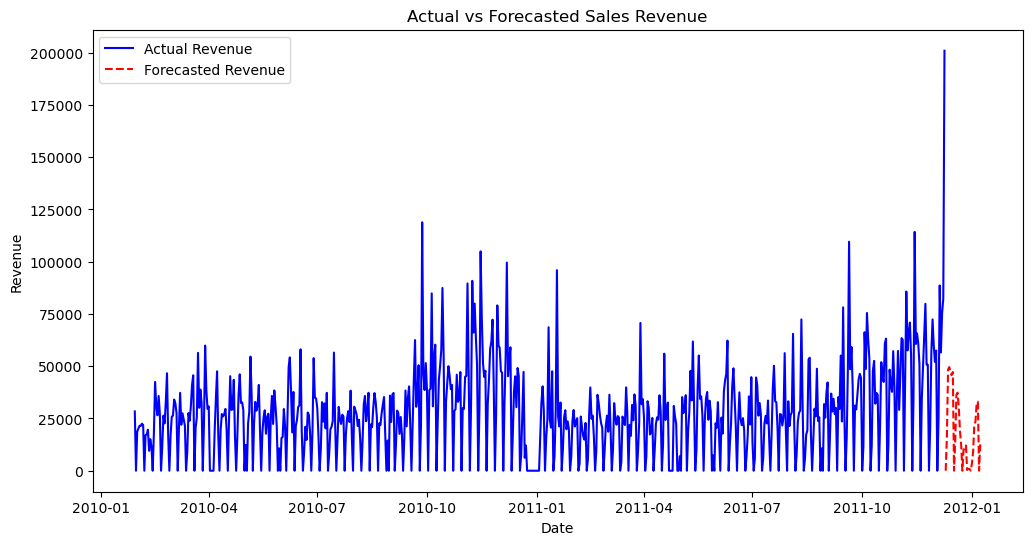

In [100]:
# Ensure your date column is in datetime format
df_sales_daily['InvoiceDate'] = pd.to_datetime(df_sales_daily['InvoiceDate'])
df_sales_daily.set_index('InvoiceDate', inplace=True)

# Feature Engineering
df_sales_daily['Day'] = df_sales_daily.index.day
df_sales_daily['Month'] = df_sales_daily.index.month
df_sales_daily['Year'] = df_sales_daily.index.year
df_sales_daily['DayOfWeek'] = df_sales_daily.index.dayofweek

# Define Features (X) and Target Variable (y)
X = df_sales_daily[['Day', 'Month', 'Year', 'DayOfWeek']]
y = df_sales_daily['Revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest Model
rf_model_Forecast = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_Forecast.fit(X_train, y_train)

# Predict future sales (next 30 days)
future_dates = pd.date_range(df_sales_daily.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_X = pd.DataFrame({
    'Day': future_dates.day,
    'Month': future_dates.month,
    'Year': future_dates.year,
    'DayOfWeek': future_dates.dayofweek
})

future_forecast = rf_model_Forecast.predict(future_X)

# Plot actual and forecasted revenue
plt.figure(figsize=(12, 6))
plt.plot(df_sales_daily.index, df_sales_daily['Revenue'], label='Actual Revenue', color='blue')
plt.plot(future_dates, future_forecast, label='Forecasted Revenue', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Forecasted Sales Revenue')
plt.legend()
plt.show()

**As can be observed, the shape of the forecasted revenue (red color) for 2012-01 is similar to that of 2011-01.**

## **<span style="color:blue">XI. Customer Churn Prediction</span>**

### **<span style="color:green">1. Assign a churn label to each customer</span>**
 * **Customers have not made a purchase in the last 6 months (180 days), they might be labeled as churned.**
 * **Customers with recency greater than the threshold are labeled as churned (**label = 1**); others are labeled as active (**label = 0**).**

In [101]:
df_churn = rfm.copy()

In [102]:
# fixing the churn_threshold period to 180 days (six months)
churn_threshold = 180

# Label customers as churned ( if their Recency is greater than churn_threshold period
df_churn['Churned'] = (df_churn['Recency'] > churn_threshold).astype(int)

In [103]:
# Verify that the column 'Churned' is correctly build
df_churn.head()

,CustomerID,Recency,Frequency,Monetary,CLV,AvgBasketSize,ReturnRate,DiscountUsage,DaysSinceFirstPurchase,AvgPurchaseGap,MostCommonPurchaseHour,MostCommonPurchaseDay,Cluster,R_Score,F_Score,M_Score,RFM_Score,Churned
0,12346,325,17,-51.74,-2.698098,1.127660,0.276596,0.042553,725,8.543478,13,0,0,2,4,1,241,1
1,12347,1,8,4921.53,19686.120000,13.364865,0.000000,0.018018,403,1.805430,14,1,1,4,3,4,434,0
2,12348,74,5,2019.40,134.626667,53.215686,0.000000,0.000000,437,7.240000,14,0,1,3,3,3,333,0
3,12349,18,5,4404.54,1159.089474,8.994444,0.027778,0.000000,735,3.994413,9,3,1,4,3,4,434,0
4,12350,309,1,334.40,1.078710,11.588235,0.000000,0.000000,309,0.000000,16,2,0,2,1,2,212,1


In [104]:
# Dropping the RFM_Score feature from the dataframe
df_churn = df_churn.copy()
df_churn.drop(columns=['RFM_Score'], inplace=True)

In [105]:
# Calculate the percentage of each unique value in the 'Churned' column
churned_percentage = round(df_churn['Churned'].value_counts(normalize=True) * 100, 2)
print(churned_percentage)

Churned
0    59.07
1    40.93
Name: proportion, dtype: float64


The provided distribution of the 'Churned' variable indicates that approximately 59.07% of customers have not churned (labeled as '0'), while 40.93% have churned (labeled as '1'). This reflects a moderate class imbalance, with non-churned customers being the majority class.

### **<span style="color:green">2. Data Preprocessing</span>**

#### **Checking and Handling missing values**

In [106]:
df_churn.isnull().mean() * 100

CustomerID                0.000000
Recency                   0.000000
Frequency                 0.000000
Monetary                  0.000000
CLV                       0.000000
AvgBasketSize             0.000000
ReturnRate                0.000000
DiscountUsage             0.000000
DaysSinceFirstPurchase    0.000000
AvgPurchaseGap            2.541232
MostCommonPurchaseHour    0.000000
MostCommonPurchaseDay     0.000000
Cluster                   0.000000
R_Score                   0.000000
F_Score                   0.000000
M_Score                   0.000000
Churned                   0.000000
dtype: float64

* **For the AvgPurchaseGap feature there are 2.54% of missing values. For all other columns, there are no missing bvalues.**

**Handling missing values in the "AvgPurchaseGap" feature:**
* **K-Nearest Neighbors (KNN) Imputation**:
Estimate missing values based on the AvgPurchaseGap values of similar customers.

In [107]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_churn[['AvgPurchaseGap']] = imputer.fit_transform(df_churn[['AvgPurchaseGap']])

In [108]:
# Checking if the missing values are handled
df_churn.AvgPurchaseGap.isnull().mean() * 100

0.0

* **There are no missing values now!**

#### **Feature Scaling**

In [109]:
# Separate features and target variable
X = df_churn.drop('Churned', axis=1)
y = df_churn['Churned']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int32', 'int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Mean imputation
    ('scaler', StandardScaler())  # Standardization
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mode imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert X_preprocessed to a dataframe
columns_names = X.columns.tolist()
X_preprocessed = pd.DataFrame(X_preprocessed, columns=columns_names)

### **<span style="color:green">3. Model Training</span>**

### **Data Splitting**
* Divide the dataset into training and testing subsets to evaluate model performance.

In [111]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### **Model Building and Training**

In [112]:
# Define the model : Random Forest Classifier
rf_model_churn = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_model_churn)])

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'CLV',
       'AvgBasketSize', 'ReturnRate', 'DiscountUsage',
       'DaysSinceFirstPurchase', 'AvgPurchaseGap', 'MostCommonPurchaseHour',
       'MostCommonPurchaseDay', 'Cluster', 'R_Score', 'F_Score', 'M_Score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### **Model Evaluation**

**Let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [113]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, 
                          xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.3%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if title:
        plt.title(title)

In [114]:
# Creating metric function
def metrics_score(y_true, y_pred, y_proba):
    """
    Evaluates model performance using various classification metrics, prioritizing recall and AUC-ROC for fraud detection.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    y_proba (array-like): Predicted probabilities for the positive class.

    Returns:
    None (Prints metrics, confusion matrix, and classification report).
    """
    print("\nModel Performance Metrics:")
    
    # Recall (Priority for fraud detection)
    recall = recall_score(y_true, y_pred)
    print(f"Recall (Priority Metric): {recall:.4f}")

    # AUC-ROC Score (Priority for fraud detection)
    auc_roc = roc_auc_score(y_true, y_proba)
    print(f"AUC-ROC Score (Priority Metric): {auc_roc:.4f}")

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_true, y_pred)
    print(f"Precision: {precision:.4f}")

    # F1 Score
    f1 = f1_score(y_true, y_pred)
    print(f"F1 Score: {f1:.4f}")
    
    # Detailed Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    labels = ['True Positive','False Negative','False Positive','True Negative']
    categories = [ 'Non-Churned','Churned']
    make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='Blues')

### **Checking the performance of the model on the test dataset**


Model Performance Metrics:
Recall (Priority Metric): 1.0000
AUC-ROC Score (Priority Metric): 1.0000
Accuracy: 1.0000
Precision: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       499

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189


Confusion Matrix:


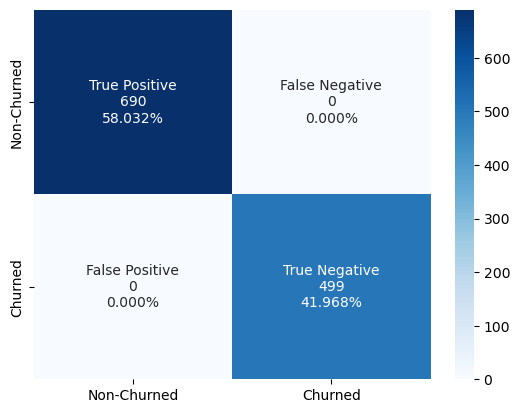

In [115]:
# Predict class labels
y_pred_test = clf.predict(X_test)

# Predict class probabilities
y_proba_test = clf.predict_proba(X_test)[:, 1] 

metrics_score(y_test, y_pred_test, y_proba_test)

### **Checking if the model is overfitted.**

**Detect Overfitting with Train vs. Test Accuracy and Cross-Validation.**

In [116]:
# Train and Test Accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Random Forest - Train Accuracy: {train_accuracy:.4f}")
print(f"Random Forest - Test Accuracy: {test_accuracy:.4f}")


Random Forest - Train Accuracy: 1.0000
Random Forest - Test Accuracy: 1.0000


### **Interpretation of results:**

#### **Model Performance Metrics Interpretation**

1. **Recall (1.0000) (Priority Metric for Churn Detection):**
    * Measures how many actual churned customers are correctly identified as churned.
    * High recall is crucial because missing a churned customer (false negative) can have serious consequences.
    * A score of 1.0000 means 100% of churned customers were correctly identified, which is excellent.
2. **AUC-ROC Score (1.0000) (Priority Metric):**
    * Reflects the model's ability to distinguish between churned and non-churned customers.
    * AUC-ROC of 1.0000 indicates perfect separation between classes, meaning the model is extremely effective at ranking predictions.
3. **Accuracy (1.0000):**
    * Measures the overall correctness of predictions (churned and non-churned combined).
    * Accuracy of 1.0000 suggests that every prediction made was correct.
4. **Precision (1.0000):**
    * Represents how many predicted churned customers are actually churned.
    * A precision of 1.0000 means that all flagged churned cases were truly churned.
5. **F1 Score (1.0000):**
    * The harmonic mean of precision and recall, balancing both metrics.
    * A high F1-score (1.0000) suggests excellent model performance, even when balancing false positives and false negatives.

#### **Overfitting Check**
* **Train Accuracy (1.0000) vs. Test Accuracy (1.0000):**
    * Identical and perfect scores suggest that the model predicts all outcomes correctly on both training and test sets.
    * This may indicate overfitting, as perfect accuracy is rare in real-world scenarios. A model should generalize well without memorizing the data.


### **Checking & Visualizing the Feature Importance**

In [339]:
pip install --upgrade executing

  Attempting uninstall: executing
    Found existing installation: executing 0.8.3
    Uninstalling executing-0.8.3:
      Successfully uninstalled executing-0.8.3
Note: you may need to restart the kernel to use updated packages.


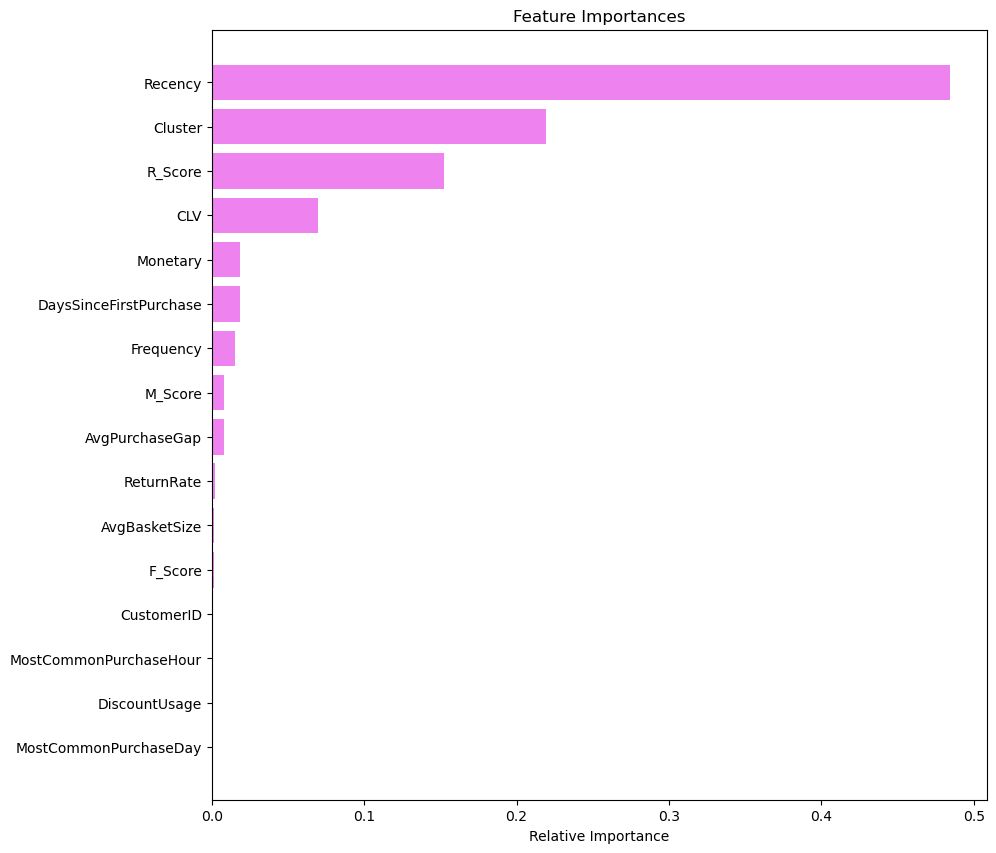

In [117]:
# Plotting the feature importance
features = list(X_train.columns)

importances = rf_model_churn.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [118]:
def select_top_features(importances, feature_names, N=5):
    """
    Select the top N most important features.

    Parameters:
        importances (array-like): The feature importance scores.
        feature_names (list or array-like): Names of the features.
        N (int): The number of top features to select.

    Returns:
        list: Names of the top N most important features.
    """
    # Sort indices in descending order of importance
    sorted_idx = np.argsort(importances)[::-1]
    
    # Get the top N feature names
    top_features = np.array(feature_names)[sorted_idx[:N]]
    top_importances = importances[sorted_idx[:N]]

    return top_features, top_importances

# Select the top N features
top_N = 7  # Change this to the desired number of features
top_features, top_importances = select_top_features(importances, features, N=top_N)

print(f"Top {top_N} Features:")
print(' ')
for i, (feature, importance) in enumerate(zip(top_features, top_importances), 1):
    print(f"{i}. {feature}: {importance:.7f}")

Sum_top = top_importances.sum()
print(' ')
print(f" Sum of the Top {top_N} Features Importances: {Sum_top:.3f}") 

Top 7 Features:
 
1. Recency: 0.4844130
2. Cluster: 0.2194652
3. R_Score: 0.1521475
4. CLV: 0.0699561
5. Monetary: 0.0186827
6. DaysSinceFirstPurchase: 0.0184076
7. Frequency: 0.0153878
 
 Sum of the Top 7 Features Importances: 0.978


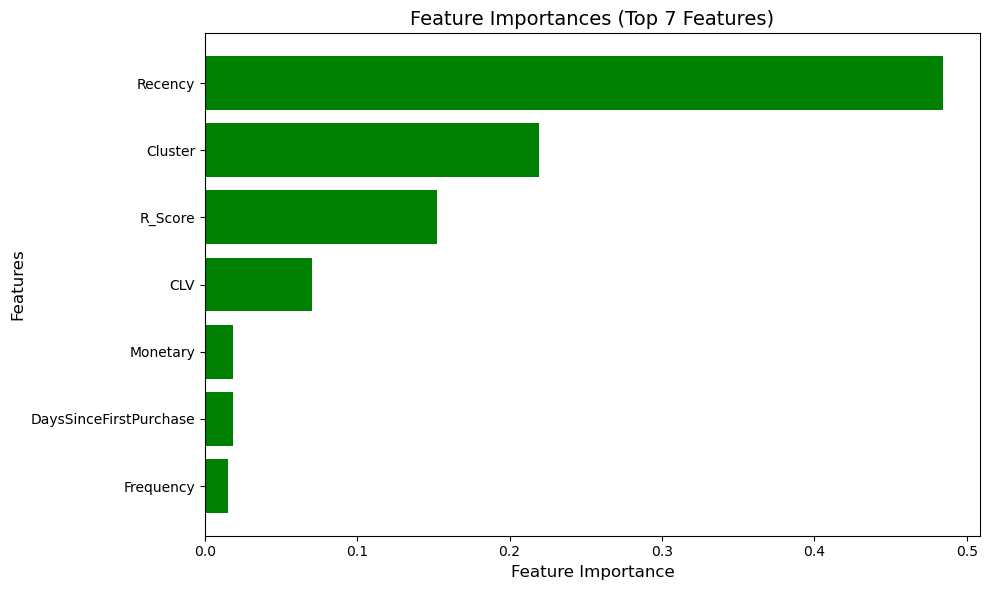

In [119]:
def plot_feature_importances(importances, feature_names, top_N=None):
    """
    Plot feature importances as a bar chart, showing both positive and negative values.

    Parameters:
        importances (array-like): The feature importance scores.
        feature_names (list or array-like): Names of the features.
        top_N (int or None): The number of top features to display. If None, display all features.
    """
    # Combine feature names and importances
    feature_importance_pairs = sorted(
        zip(feature_names, importances),
        key=lambda x: abs(x[1]),  # Sort by absolute importance
        reverse=True
    )
    
    # Limit to top N features if specified
    if top_N:
        feature_importance_pairs = feature_importance_pairs[:top_N]
    
    # Separate feature names and importances for plotting
    sorted_features, sorted_importances = zip(*feature_importance_pairs)
    
    # Plot
    plt.figure(figsize=(10, 6))
    colors = ['green' if importance > 0 else 'red' for importance in sorted_importances]
    plt.barh(sorted_features, sorted_importances, color=colors)
    plt.xlabel("Feature Importance", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title(f"Feature Importances (Top {top_N} Features)" if top_N else "Feature Importances", fontsize=14)
    plt.axvline(0, color='black', linewidth=0.7, linestyle='--')  # Add vertical line at zero
    plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
    plt.tight_layout()
    plt.show()

# Plot the feature importances
plot_feature_importances(top_importances, top_features, top_N=top_N)  # Adjust `top_N` as needed
# importances, feature,
#top_features, top_importances

### **Interpretations:**

The feature importance scores you've provided offer valuable insights into which factors most significantly influence your model's predictions regarding customer churn.
* **Recency (0.4844):** This feature has the highest importance score, indicating that the number of days since a customer's last purchase is the most critical factor in predicting churn. Customers who haven't made recent purchases are more likely to churn.
* **Cluster (0.2195):** The 'Cluster' feature, likely derived from a clustering algorithm, suggests that certain customer segments are more prone to churn.  This segmentation helps the model identify groups with higher churn probabilities.
* **R_Score (0.1521):** The 'R' in RFM (Recency, Frequency, Monetary) analysis represents Recency. A higher R_Score indicates recent engagement, which typically correlates with a lower likelihood of churn.
* **Customer Lifetime Value (CLV) (0.0700):** CLV estimates the total revenue a customer will generate over their relationship with the company. Customers with lower CLV may be more inclined to churn, possibly due to lower engagement or satisfaction.
* **Monetary (0.0187):** This component of the RFM analysis reflects the total spending of a customer. While it has a lower importance score, it still contributes to the model's understanding of churn behavior.
* **Days Since First Purchase (0.0184):** The duration since a customer's initial purchase can influence churn, with newer customers potentially being more susceptible to churning.
* **Frequency (0.0154):** Another component of RFM, Frequency measures how often a customer makes a purchase. Higher frequency often indicates loyalty, reducing churn likelihood.

Collectively, these features underscore the significance of customer engagement metrics—such as recency, frequency, and monetary value—in predicting churn. Understanding these factors can guide targeted interventions to enhance customer retention.

## **<span style="color:blue">XII. Building Recommendation Systems</span>**

### **<span style="color:green">1. Data Cleaning</span>**

In [141]:
# Checking the info of df_customer dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1033035
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            779425 non-null  object        
 1   StockCode          779425 non-null  object        
 2   Description        779425 non-null  object        
 3   Quantity           779425 non-null  int64         
 4   InvoiceDate        779425 non-null  datetime64[ns]
 5   UnitPrice          779425 non-null  float64       
 6   CustomerID         779425 non-null  int32         
 7   Country            779425 non-null  object        
 8   TotalPrice         779425 non-null  float64       
 9   AvgOrderValue      779425 non-null  float64       
 10  Discounted         779425 non-null  bool          
 11  Hour               779425 non-null  int32         
 12  Weekday            779425 non-null  int32         
 13  DaysSincePurchase  779425 non-null  int64       

#### **Remove Cancellations: Exclude transactions where 'Invoice' starts with 'C', indicating cancellations:**

In [142]:
df_customer = df_customer[~df_customer['Invoice'].astype(str).str.startswith('C')]
df_customer.shape

(779425, 17)

**18390 transactions are removed because of cancellations.**

#### **Filter Positive Quantities and Prices: Ensure Quantity and UnitPrice are positive:**

In [143]:
df_customer = df_customer[(df_customer['Quantity'] > 0) & (df_customer['UnitPrice'] > 0)]
df_customer.shape

(779425, 17)

**70 transactions are removed because of negative values of 'Quantity' or 'UnitPrice'.**

In [144]:
# Data Transformation: Convert the InvoiceDate to a datetime format.
df_customer['InvoiceDate'] = pd.to_datetime(df_customer['InvoiceDate'])

### **<span style="color:green">2. Building the Recommendation System</span>**

We can enhance the recommendation system by incorporating additional features such as "InvoiceDate", "Description", and "UnitPrice". We can extend the traditional user-item interaction matrix to include these variables.

### **Incorporate Temporal Dynamics (InvoiceDate)**

* **Time-Decay Weighting:** Assign higher importance to recent interactions by applying a decay function to the Quantity values based on the recency of InvoiceDate. This approach ensures that the model emphasizes recent user behaviors.

In [145]:
# Define a decay function
def time_decay(days, half_life = 30):
    return 0.5 ** (days / half_life)

# Define a reference date (e.g., the last invoice date in dataset)
reference_date = df_customer['InvoiceDate'].max()

# Calculate days since each purchase
df_customer['DaysSincePurchase'] = (reference_date - df_customer['InvoiceDate']).dt.days

# Apply the decay function to the Quantity
df_customer['WeightedQuantity'] = df_customer['Quantity'] * time_decay(df_customer['DaysSincePurchase'])

# Create the weighted user-item matrix
user_item_matrix = df_customer.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='WeightedQuantity',
    aggfunc='sum',
    fill_value=0
)

### **Combine Time-Decay Weighting with Price Information**

* **Weighted Quantity with Price:** Multiply the time-decayed quantity by the normalized price to create a composite score that reflects both recency and price sensitivity.

In [146]:
# Normalize UnitPrice with MinMaxScaler to avoid negative values
scaler = MinMaxScaler()
df_customer['NormalizedPrice'] = scaler.fit_transform(df_customer[['UnitPrice']])

# Calculate a composite score
df_customer['CompositeScore'] = df_customer['WeightedQuantity'] * df_customer['NormalizedPrice']

# Create the composite user-item matrix
user_item_matrix_composite = df_customer.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='CompositeScore',
    aggfunc='sum',
    fill_value=0
)

* **Matrix Factorization:** Apply techniques like Singular Value Decomposition (SVD) to factorize the user-item matrix into latent factors representing users and items.

In [134]:
#from sklearn.decomposition import TruncatedSVD

# Convert all column names to strings
#user_item_matrix_composite.columns = user_item_matrix_composite.columns.astype(str)

# Initialize SVD
#svd = TruncatedSVD(n_components = 100)

# Fit and transform the user-item matrix
#user_factors = svd.fit_transform(user_item_matrix_composite)
#item_factors = svd.components_.T

### **Leverage Product Descriptions (Description)**

#### **1. Content-Based Filtering:**

* **Feature Extraction:** Transform product descriptions into numerical vectors using techniques like TF-IDF (Term Frequency-Inverse Document Frequency). This process captures the importance of words in each product description relative to the entire dataset.


In [147]:
# Standardize item list
standardized_items = df_customer['StockCode'].unique()

# Filter DataFrame to include only standardized items
df_filtered = df_customer[df_customer['StockCode'].isin(standardized_items)]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Compute TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['Description'])

#### **2. Create a Mapping of Product IDs to Matrix Indices:**
Construct a dictionary that maps each product identifier to its corresponding row index in the TF-IDF matrix.

In [202]:
# Assuming 'product_ids' is a list of product identifiers in the same order as 'product_descriptions'
product_id_to_index = {product_id: idx for idx, product_id in enumerate(standardized_items)}

#### **3. Efficient Similarity Computation with Annoy:**

* **Annoy Integration:** To efficiently compute similarities between high-dimensional vectors, use the Annoy library, which is optimized for approximate nearest neighbor searches.

In [148]:
# Number of features (dimensions) in TF-IDF
f = tfidf_matrix.shape[1]

# Initialize AnnoyIndex
annoy_index = AnnoyIndex(f, 'angular')

# Add items to Annoy index
for i in range(tfidf_matrix.shape[0]):
    annoy_index.add_item(i, tfidf_matrix[i].toarray()[0])

# Build the index with a specified number of trees
annoy_index.build(50)  # You can increase the number of trees for more accuracy

# Save the index to disk
annoy_index.save('product_descriptions.ann')

True

In [208]:
# Example: Find top 10 similar products to the first product
similar_items = annoy_index.get_nns_by_item(22152, 10)

print("Top 10 similar products to Product 1:", similar_items)

Top 10 similar products to Product 1: [532, 3842, 8443, 8724, 9137, 9176, 13116, 18509, 22152, 28264]


### **Combine Multiple Features**
   Develop hybrid recommendation models that combine collaborative filtering with content-based methods. By integrating user-item interactions with product content and pricing information, we can enhance recommendation accuracy.
#### **1. Matrix Factorization:** 
Apply matrix factorization techniques to the composite **user-item matrix** to obtain **user and item latent factors**.

In [150]:
# Convert column names to strings
user_item_matrix_composite.columns = user_item_matrix_composite.columns.astype(str)

# Apply matrix factorization on the composite user-item matrix
nmf = NMF(n_components = 100)
user_factors = nmf.fit_transform(user_item_matrix_composite)
item_factors = nmf.components_

#### **2. Content Based Recommendations:** 
Retrieve similar products based on product descriptions using the **Annoy index**.

In [210]:
# standardized_items is a list of product identifiers in the same order as 'product_descriptions'
product_id_to_index = {product_id: idx for idx, product_id in enumerate(standardized_items)}

def get_content_based_recommendations(product_id, top_n=5):
    # Retrieve the row index for the given product_id
    row_index = product_id_to_index.get(product_id)
    if row_index is None:
        raise ValueError(f"Product ID {product_id} not found in the mapping.") 

    # Retrieve the TF-IDF vector for the given product
    product_vector = tfidf_matrix[row_index].toarray()[0]

    # Use Annoy to find similar items
    similar_items = annoy_index.get_nns_by_vector(product_vector, top_n)
    return similar_items

In [237]:
get_content_based_recommendations(22152, top_n=10)

[590, 10895, 13788, 19003, 21636, 27614, 33976, 52997, 61181, 62596]

#### **3. Collaborative Filtering Recommendations:**
Recommend products based on user preferences derived from the user-item interaction matrix.

In [232]:
# Assuming 'user_ids' is a list or array of unique user IDs
unique_user_ids = np.unique(df_customer['CustomerID'])
user_id_to_index = {user_id: index for index, user_id in enumerate(unique_user_ids)}

# Transpose item_factors if Necessary
item_factors = item_factors.T

def get_collaborative_recommendations(user_id, top_n=5):
    # Retrieve the matrix index for the given user_id
    row_index = user_id_to_index.get(user_id)
    if row_index is None:
        raise ValueError(f"User ID {user_id} not found in the mapping.")

    # Retrieve the user factor vector
    user_vector = user_factors[row_index]
    
    # Compute similarity scores with all items
    scores = item_factors.dot(user_vector)

    # Get the indices of the top_n items with the highest scores
    top_item_indices = np.argsort(scores)[::-1][:top_n]

    return top_item_indices

In [238]:
get_collaborative_recommendations(12360, top_n=10)

array([4627, 4156, 1231, 4155, 1404, 1232, 1675, 2914, 2284,  915],
      dtype=int64)

#### **4. Hybrid Recommendation System:** 
**Combining Approaches:** Integrate the collaborative filtering and content-based models. One common method is the weighted hybrid approach, where the outputs of both models are combined using weighted averages.
Combine both sets of recommendations, adjusting the influence of each model using the alpha parameter.

In [235]:
# Hybrid recommendation function
def get_hybrid_recommendations(user_id, product_id, top_n=5, alpha=0.5):
    content_recs = get_content_based_recommendations(product_id, top_n)
    collab_recs = get_collaborative_recommendations(user_id, top_n)

    # Combine recommendations with weighting
    hybrid_scores = {}
    for idx, item in enumerate(content_recs):
        hybrid_scores[item] = hybrid_scores.get(item, 0) + (alpha * (top_n - idx))
    for idx, item in enumerate(collab_recs):
        hybrid_scores[item] = hybrid_scores.get(item, 0) + ((1 - alpha) * (top_n - idx))

    # Sort items based on hybrid scores
    hybrid_recommendations = sorted(hybrid_scores, key=hybrid_scores.get, reverse=True)
    return hybrid_recommendations[:top_n]

In [239]:
get_hybrid_recommendations(12360, 22152, top_n=10, alpha=0.5)

[590, 4627, 10895, 4156, 13788, 1231, 19003, 4155, 21636, 1404]

### **Interpreting the results:** 
The recommendation system involves understanding how each method—content-based filtering, collaborative filtering, and their hybrid—generates suggestions:

* **1. Content-Based Recommendations:** When you input get_content_based_recommendations(22152, top_n=10), the system analyzes the features of the product with ID 22152 and recommends items sharing similar attributes. The resulting list [590, 10895, 13788, 19003, 21636, 27614, 33976, 52997, 61181, 62596] comprises products that closely match the characteristics of product 22152. This approach focuses solely on item attributes, independent of user interactions.

* **2. Collaborative Filtering Recommendations:** For get_collaborative_recommendations(12360, top_n=10), the system examines the behavior of user 12360, such as past purchases or ratings, and identifies items favored by users with similar tastes. The output array([4627, 4156, 1231, 4155, 1404, 1232, 1675, 2914, 2284, 915], dtype=int64) suggests products that users with comparable preferences have engaged with, regardless of the items' inherent features.

* **3. Hybrid Recommendation System:** The hybrid approach combines both content-based and collaborative filtering methods to leverage their respective strengths. By integrating item features with user behavior data, the system provides a more comprehensive recommendation list. The result [590, 4627, 10895, 4156, 13788, 1231, 19003, 4155, 21636, 1404] includes products recommended by both individual methods, aiming to enhance accuracy and relevance.

**Key Takeaways:**
* **Content-Based Filtering** relies on product attributes, recommending items similar to those a user has shown interest in.
* **Collaborative Filtering** depends on user interaction data, suggesting items preferred by users with similar behaviors.
* **Hybrid Systems** merge both approaches to mitigate their individual limitations, such as the cold-start problem in collaborative filtering and the limited scope of content-based filtering.

By analyzing the outputs of each method, we can discern how different algorithms influence the recommendations and choose the approach that best aligns with our objectives.